In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015 (1).csv


In [21]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015 (1).csv


In [22]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015 (1).csv


In [23]:
import pandas as pd

df_binary = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df_5050 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_012 = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

df_binary.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [24]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df_5050 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_012 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

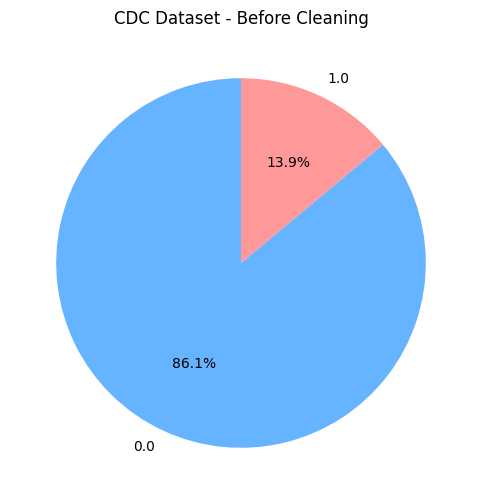

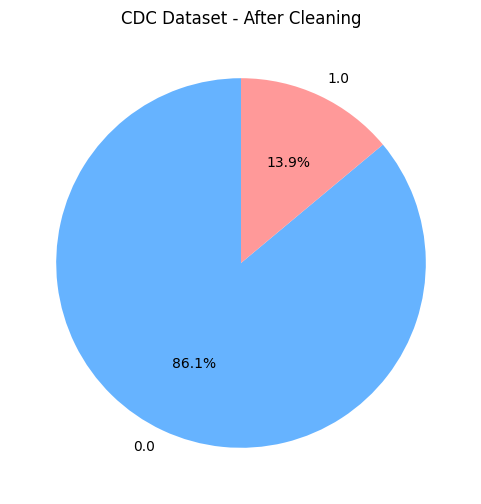

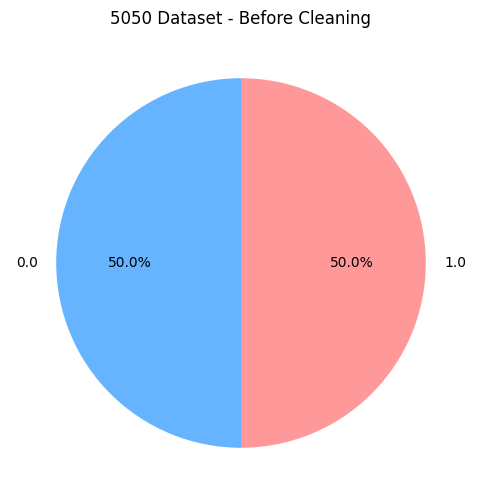

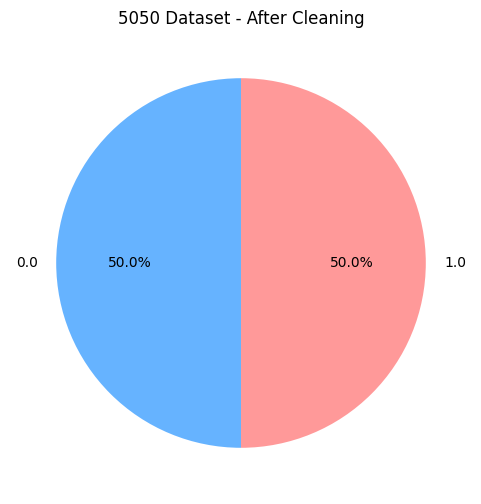

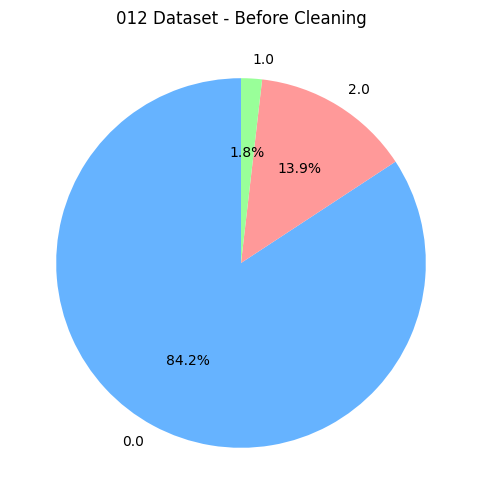

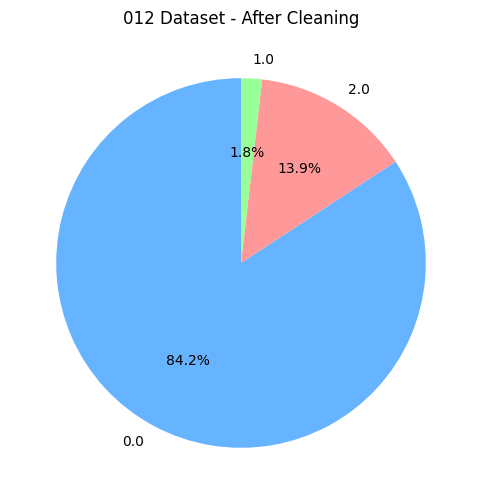

In [25]:
def plot_class_distribution(df, label_column, title):
    plt.figure(figsize=(6, 6))
    df[label_column].value_counts().plot.pie(
        autopct='%1.1f%%',
        labels=df[label_column].value_counts().index,
        startangle=90,
        colors=['#66b3ff', '#ff9999', '#99ff99'])
    plt.title(title)
    plt.ylabel('')
    plt.show()

# CDC
plot_class_distribution(df_cdc, 'Diabetes_binary', 'CDC Dataset - Before Cleaning')
plot_class_distribution(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset - After Cleaning')

# 5050
plot_class_distribution(df_5050, 'Diabetes_binary', '5050 Dataset - Before Cleaning')
plot_class_distribution(df_5050.dropna(), 'Diabetes_binary', '5050 Dataset - After Cleaning')

# 012
plot_class_distribution(df_012, 'Diabetes_012', '012 Dataset - Before Cleaning')
plot_class_distribution(df_012.dropna(), 'Diabetes_012', '012 Dataset - After Cleaning')


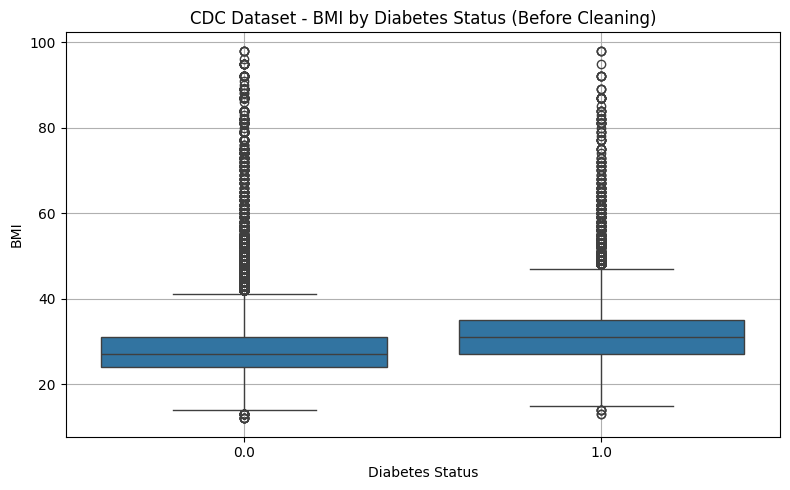

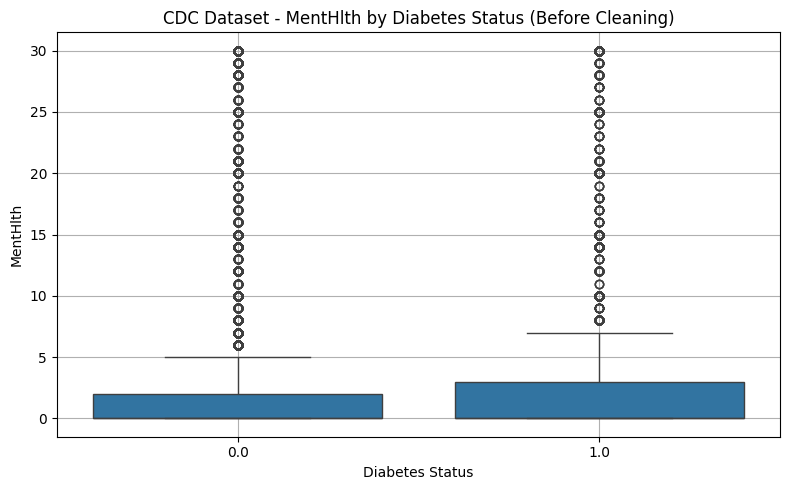

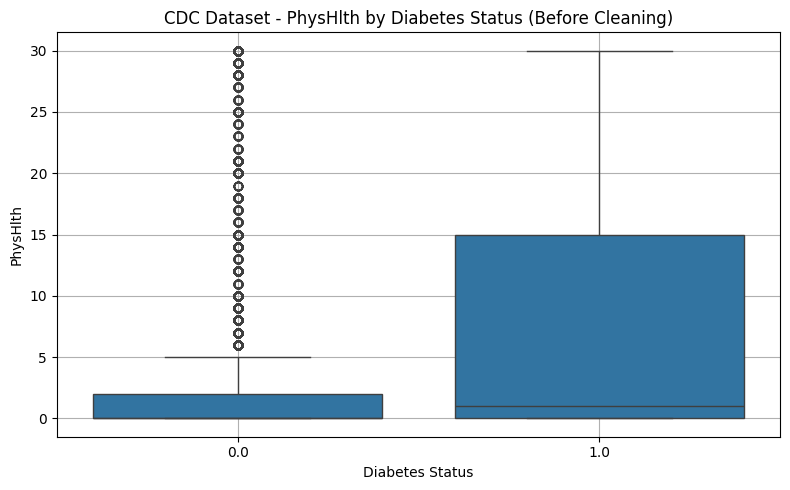

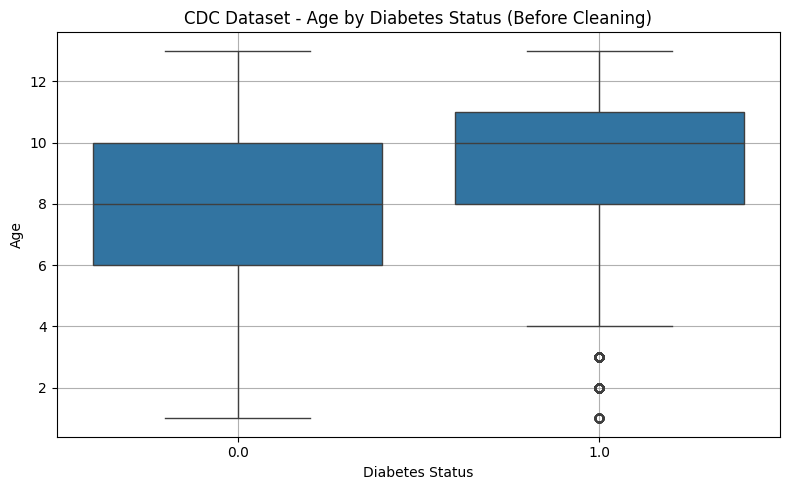

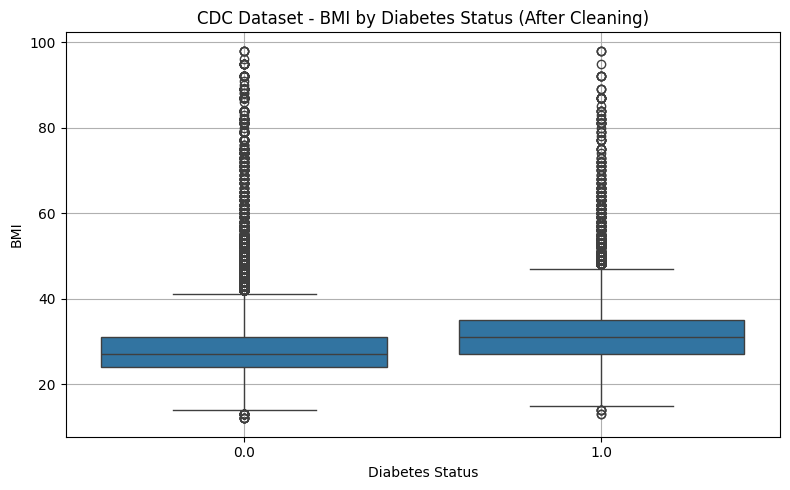

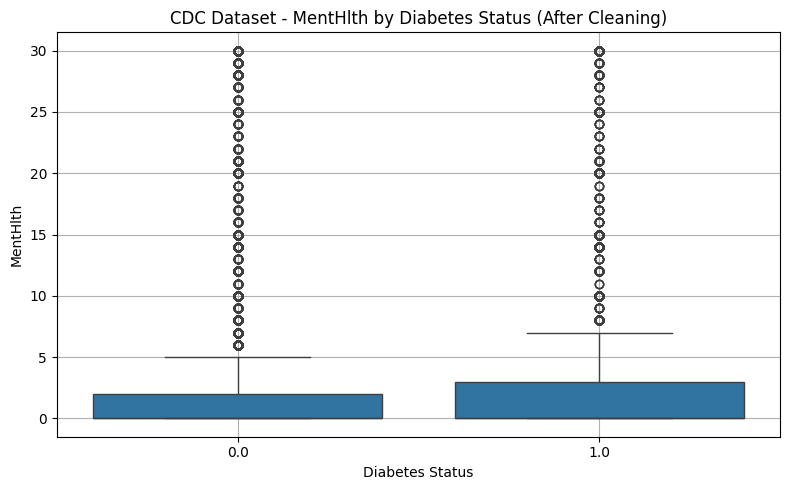

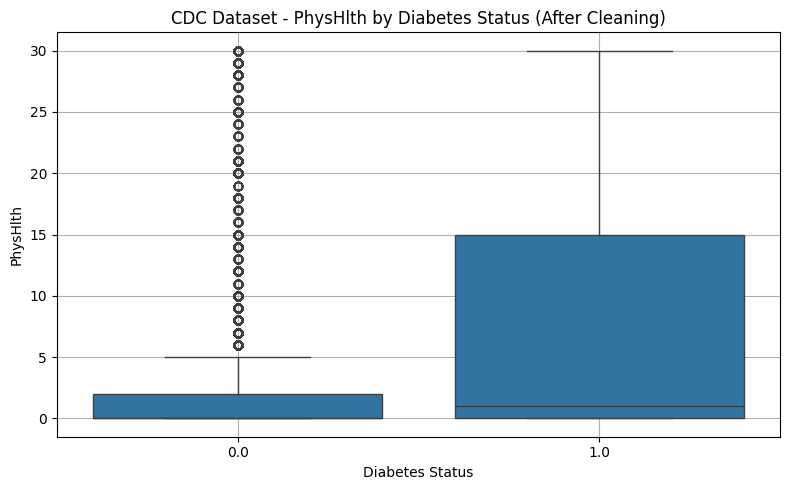

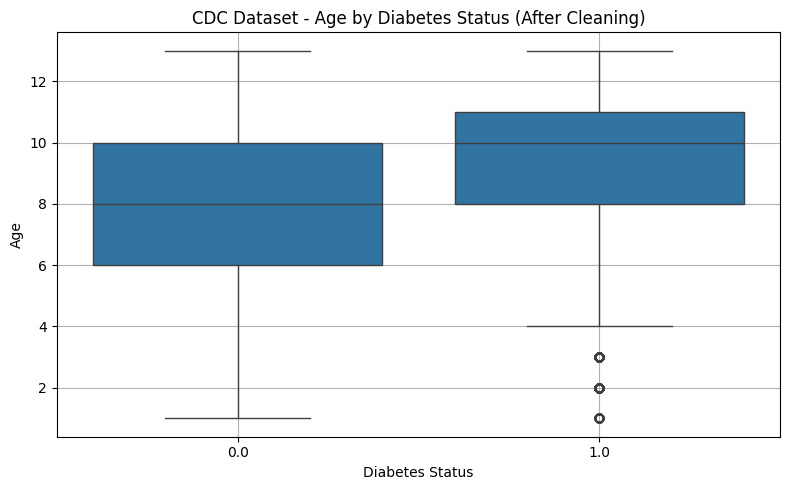

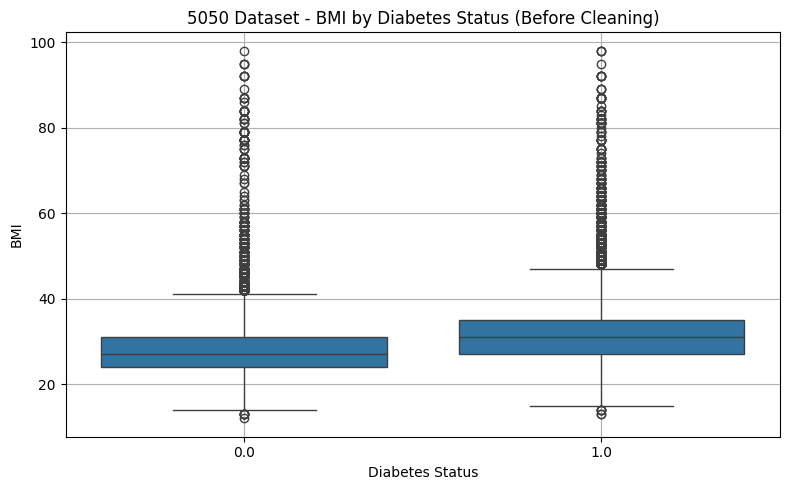

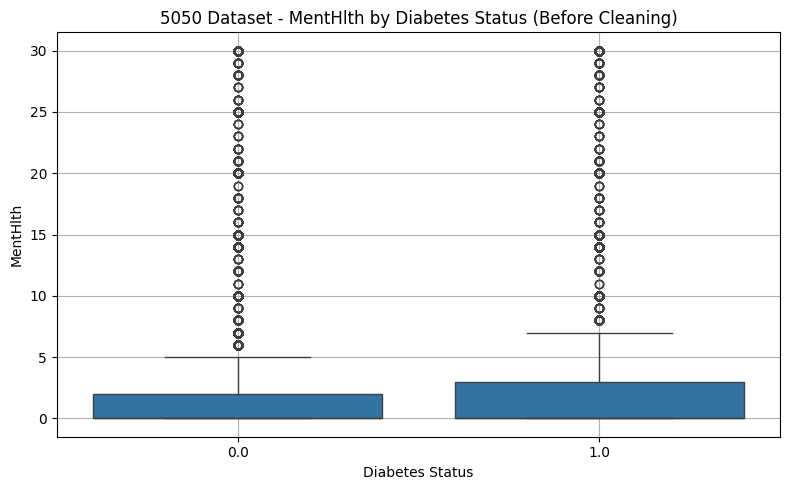

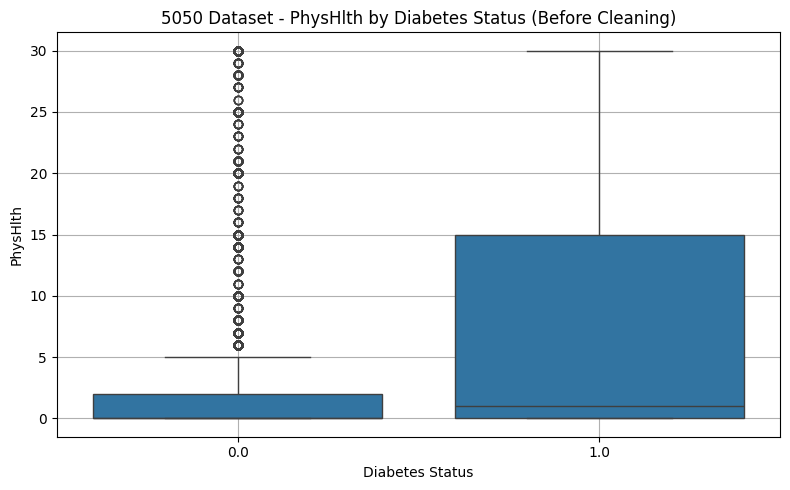

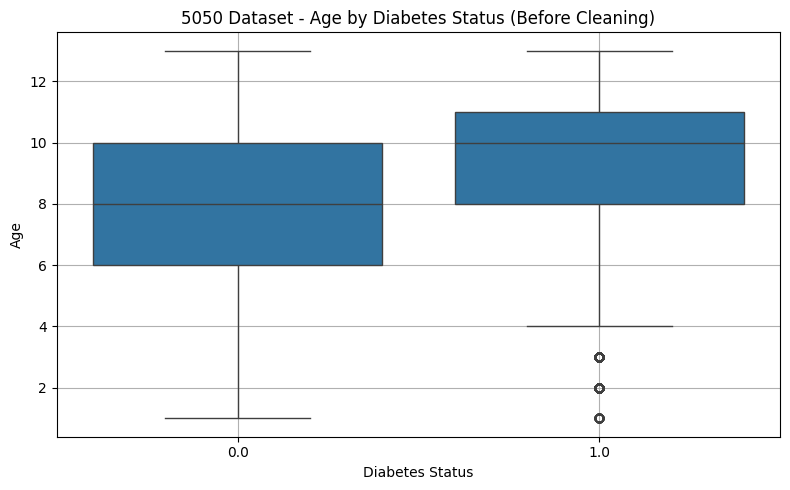

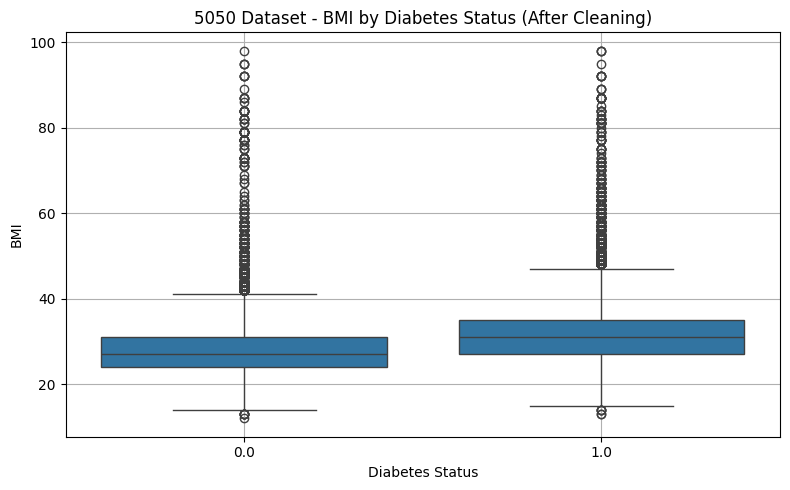

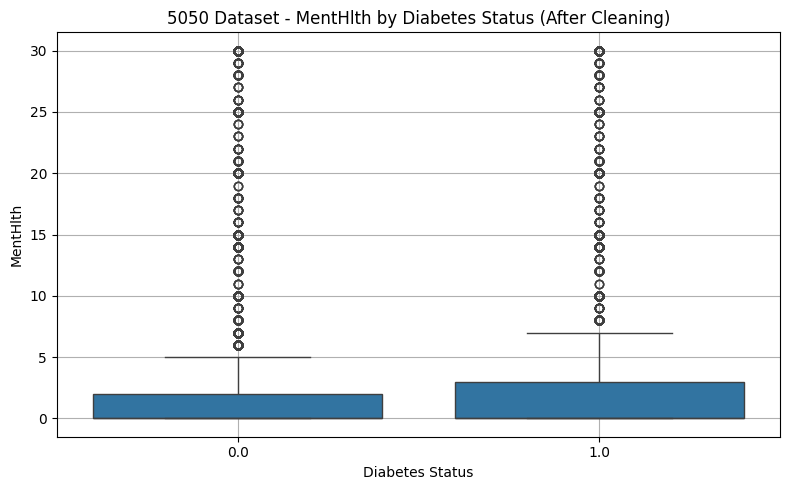

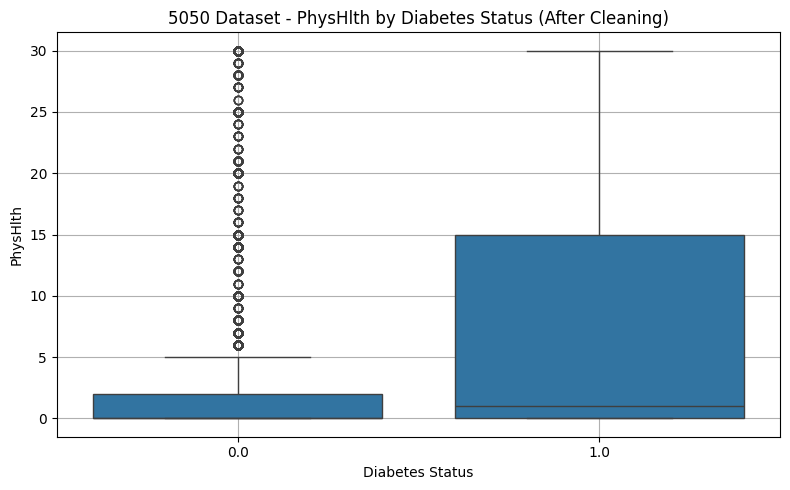

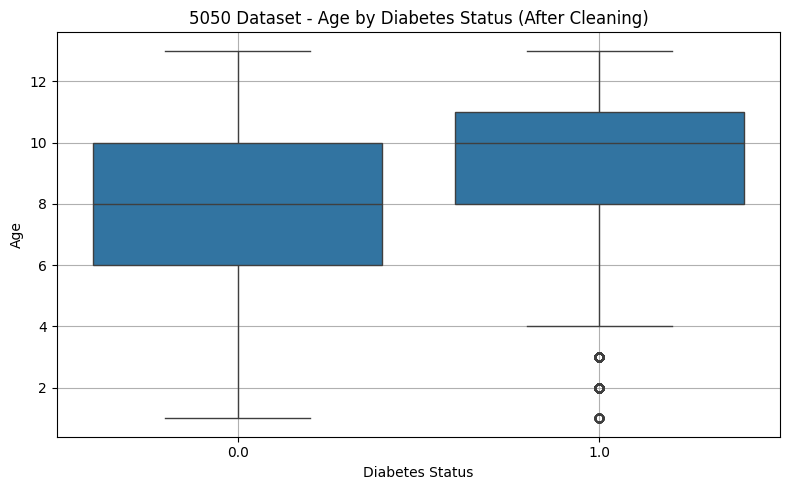

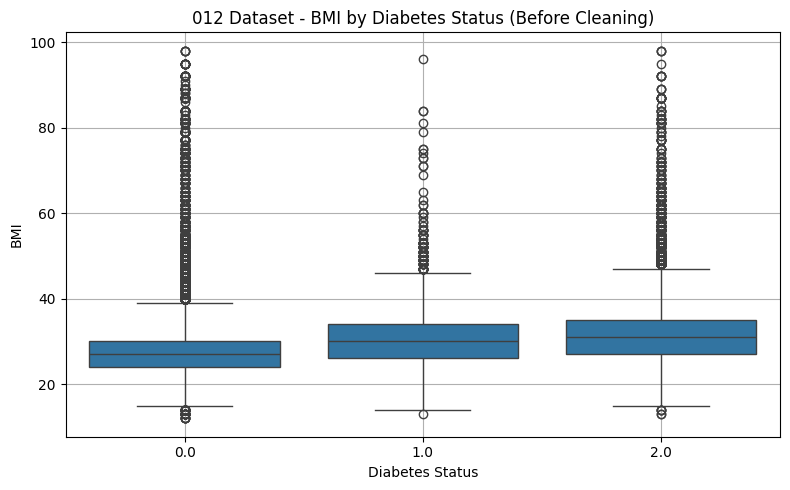

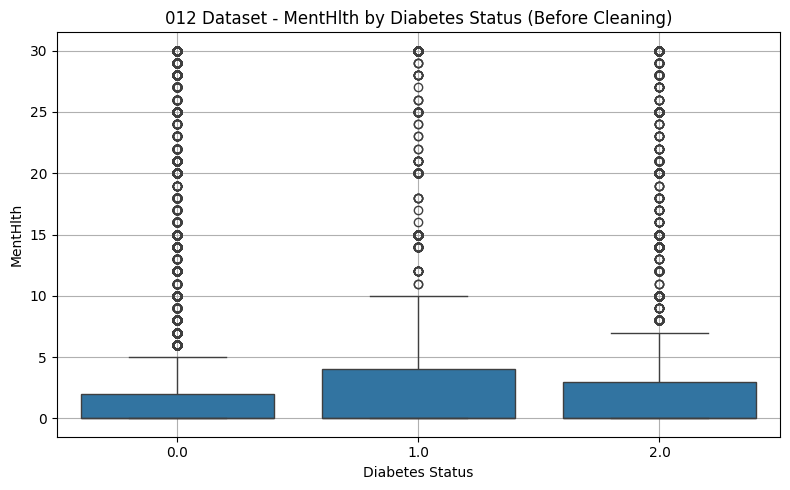

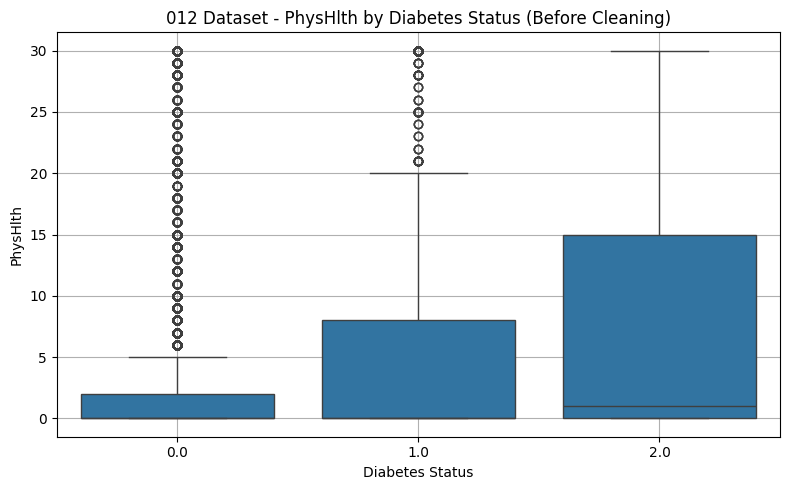

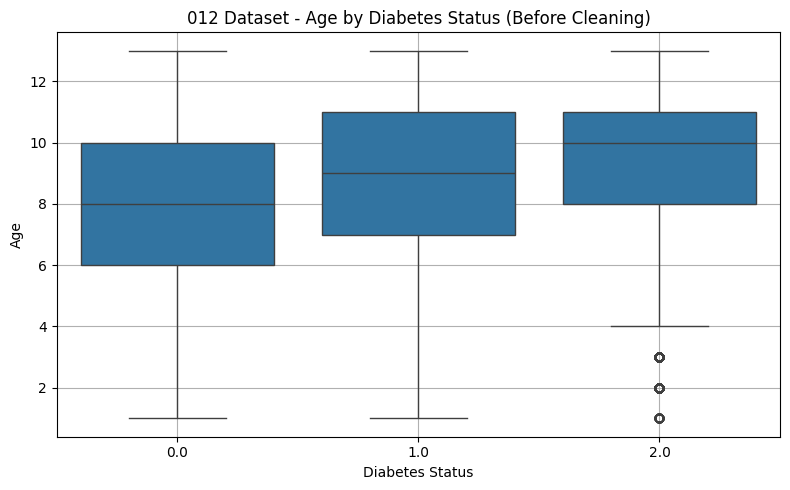

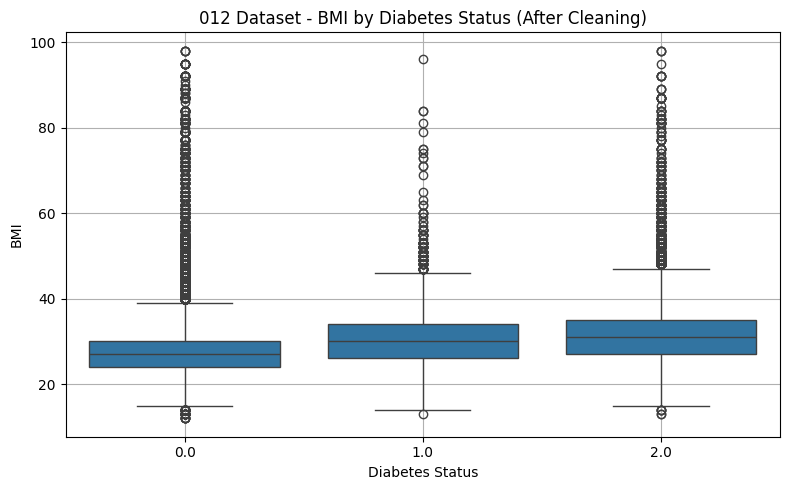

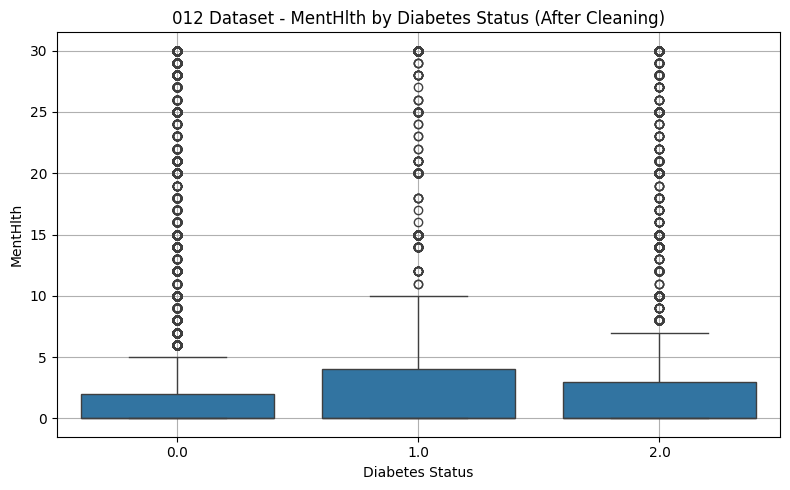

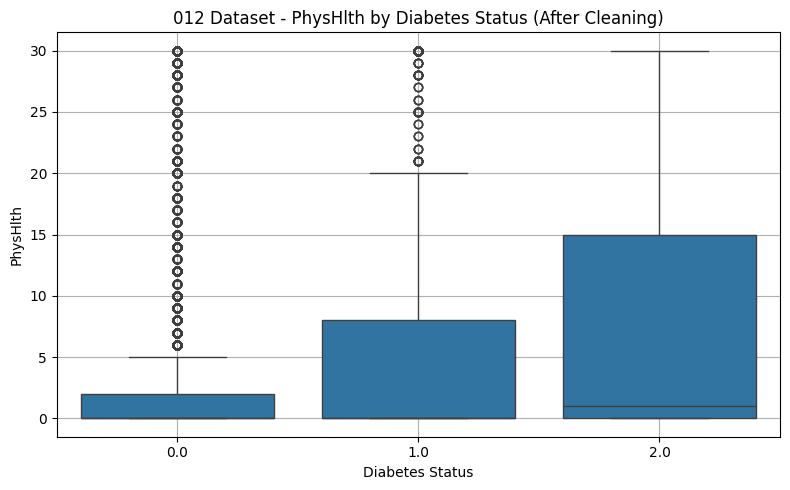

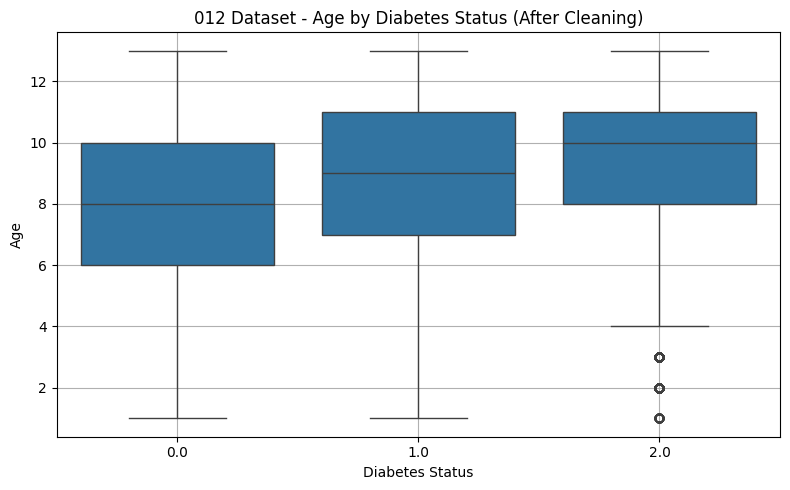

In [26]:
def plot_boxplots(df, target, features, dataset_name, stage):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=target, y=feature, data=df)
        plt.title(f'{dataset_name} - {feature} by Diabetes Status ({stage})')
        plt.xlabel('Diabetes Status')
        plt.ylabel(feature)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
features_to_plot = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
#CDC
plot_boxplots(df_cdc, 'Diabetes_binary', features_to_plot, 'CDC Dataset', 'Before Cleaning')
plot_boxplots(df_cdc.dropna(), 'Diabetes_binary', features_to_plot, 'CDC Dataset', 'After Cleaning')

#5050
plot_boxplots(df_5050, 'Diabetes_binary', features_to_plot, '5050 Dataset', 'Before Cleaning')
plot_boxplots(df_5050.dropna(), 'Diabetes_binary', features_to_plot, '5050 Dataset', 'After Cleaning')

#012 Dataset
plot_boxplots(df_012, 'Diabetes_012', features_to_plot, '012 Dataset', 'Before Cleaning')
plot_boxplots(df_012.dropna(), 'Diabetes_012', features_to_plot, '012 Dataset', 'After Cleaning')


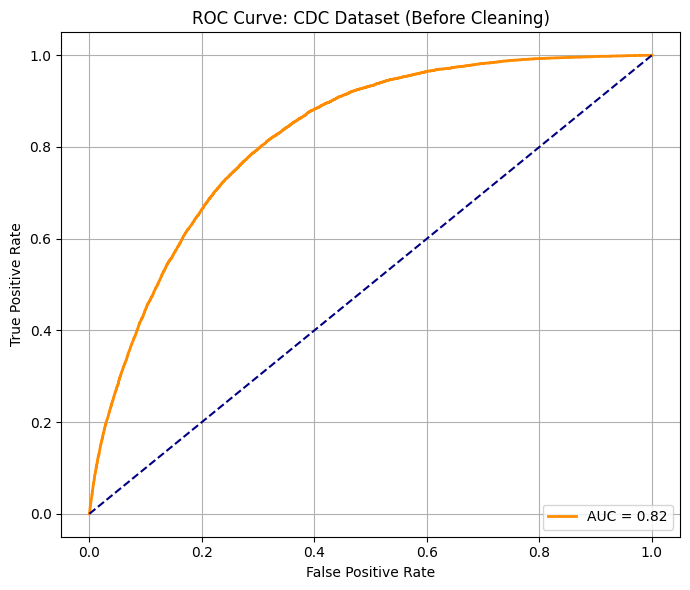

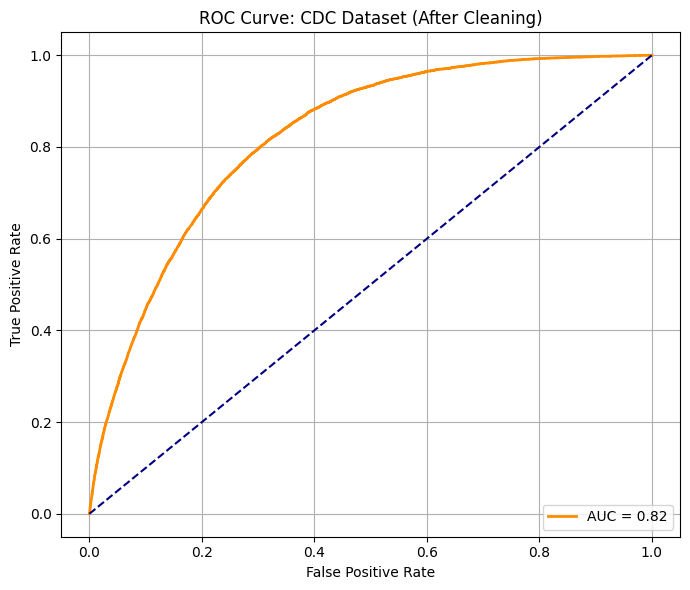

In [27]:
def plot_roc(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {dataset_name} ({stage})')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
plot_roc(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


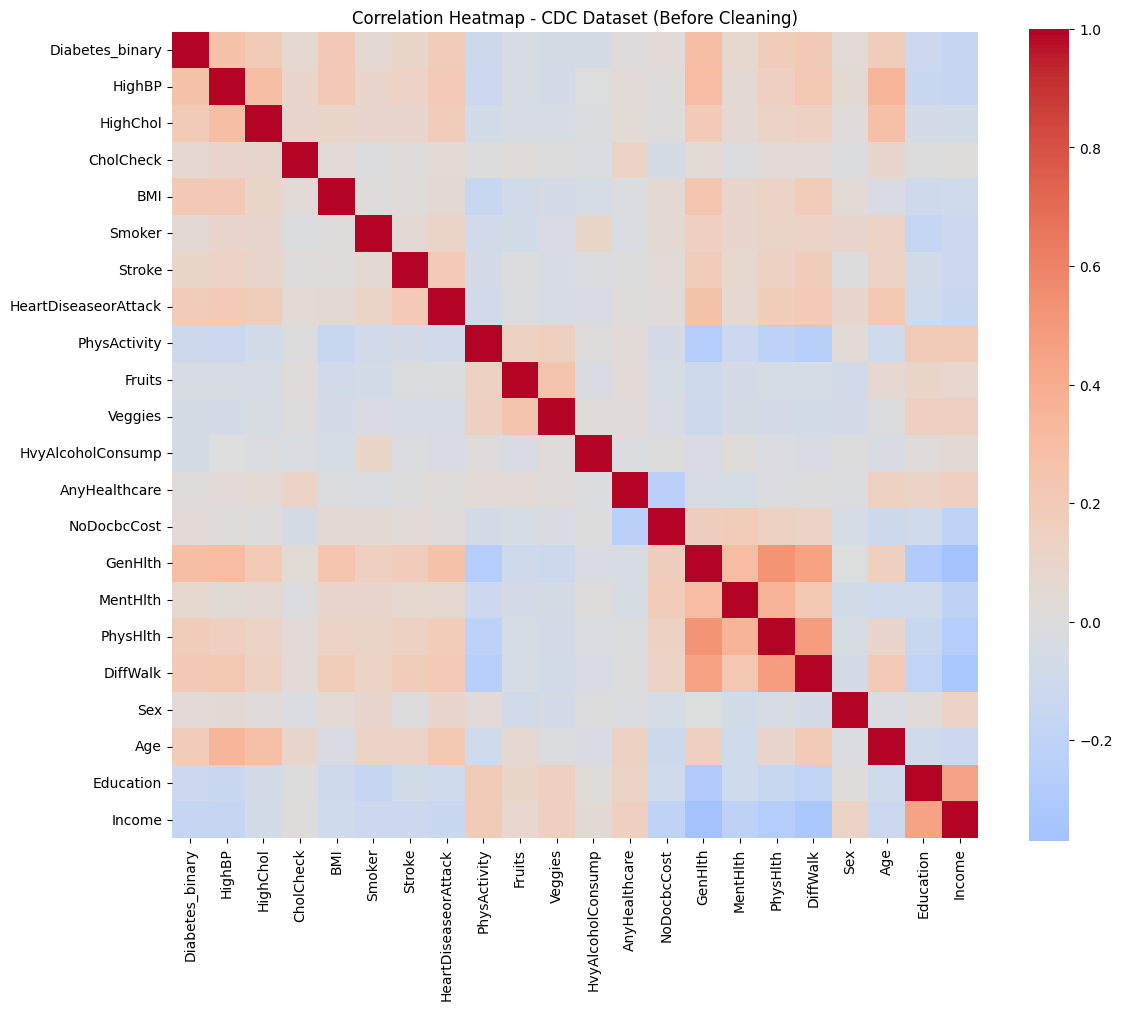

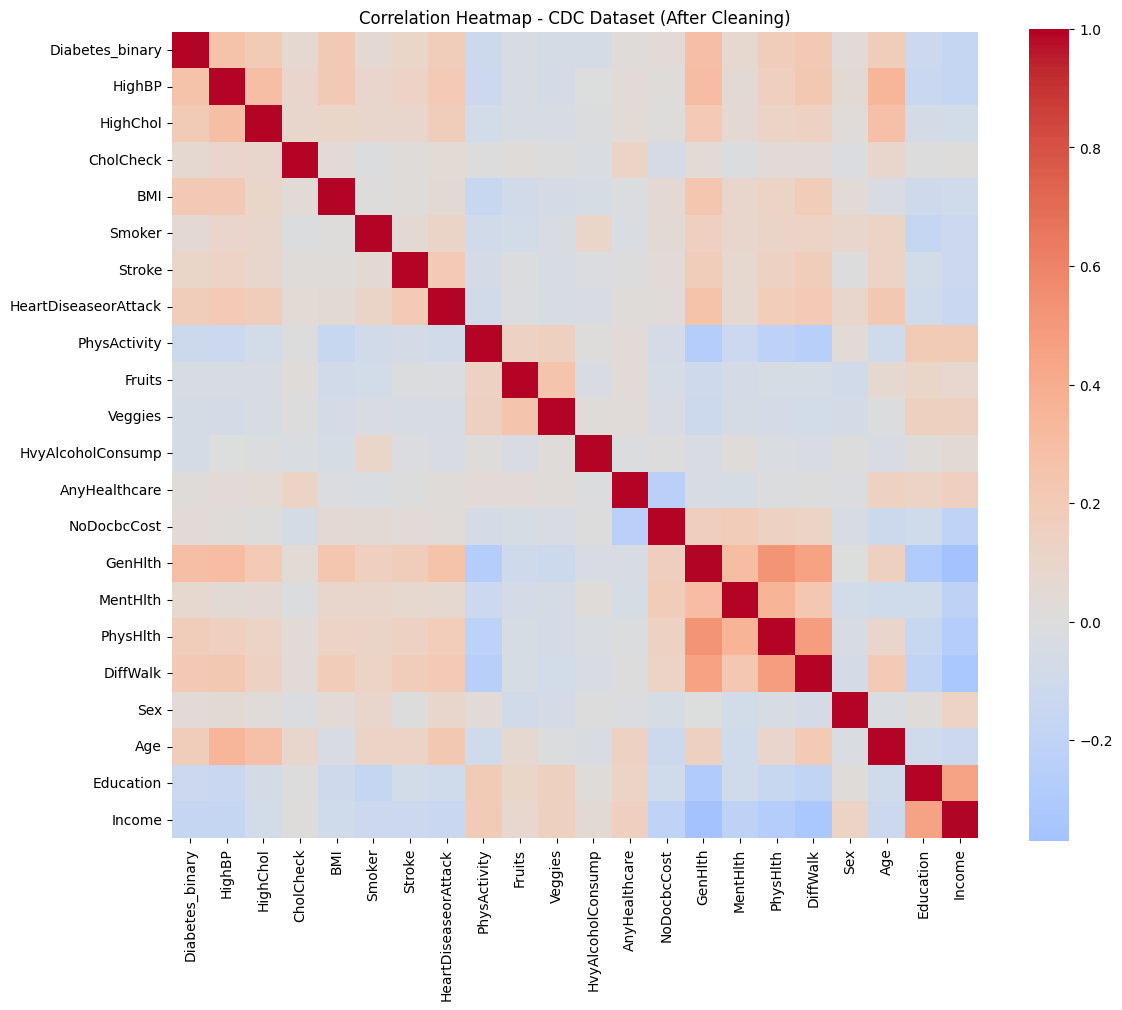

In [28]:
def plot_corr_heatmap(df, title):
    plt.figure(figsize=(12, 10))
    corr = df.corr()
    sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt='.2f', square=True)
    plt.title(f'Correlation Heatmap - {title}')
    plt.tight_layout()
    plt.show()
plot_corr_heatmap(df_cdc, 'CDC Dataset (Before Cleaning)')
plot_corr_heatmap(df_cdc.dropna(), 'CDC Dataset (After Cleaning)')


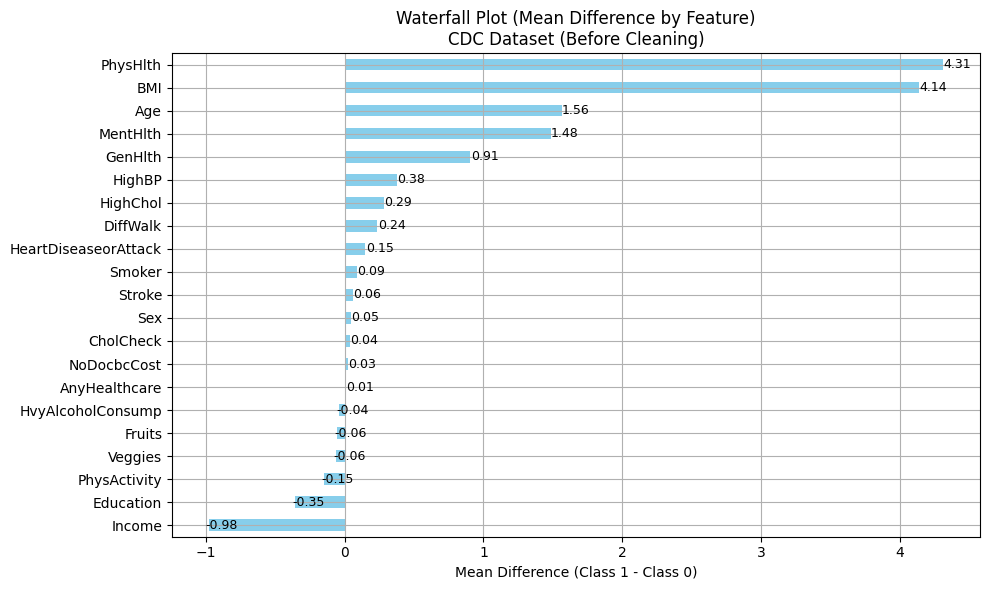

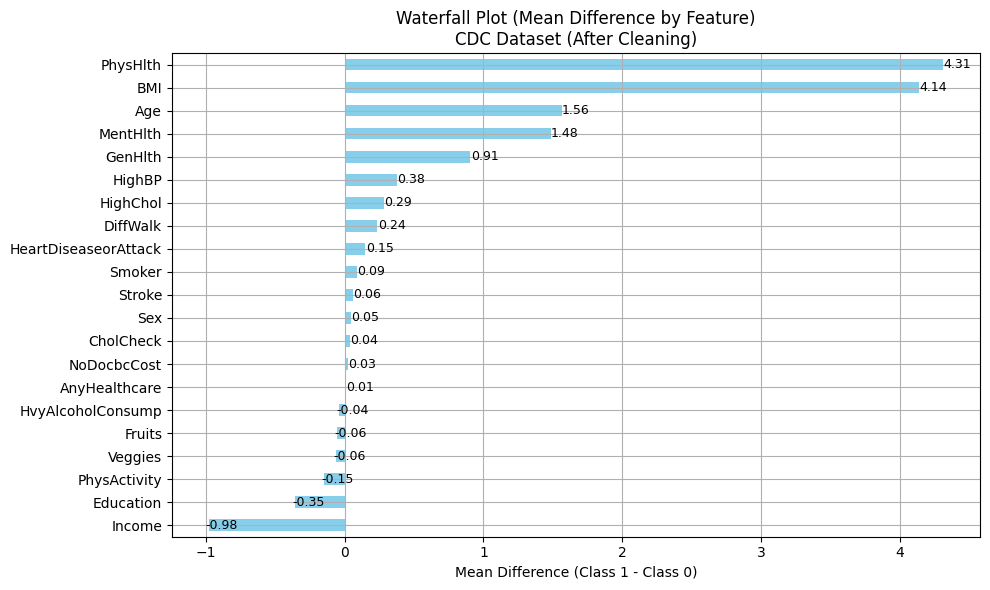

In [29]:
def plot_waterfall(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    class_0 = df_clean[df_clean[target_col] == 0].mean()
    class_1 = df_clean[df_clean[target_col] == 1].mean()
    diff = (class_1 - class_0).drop(labels=[target_col])
    diff_sorted = diff.sort_values()
    plt.figure(figsize=(10, 6))
    diff_sorted.plot(kind='barh', color='skyblue')
    plt.title(f'Waterfall Plot (Mean Difference by Feature)\n{dataset_name} ({stage})')
    plt.xlabel('Mean Difference (Class 1 - Class 0)')
    plt.grid(True)
    for i, v in enumerate(diff_sorted):
        plt.text(v + 0.002 if v > 0 else v - 0.02, i, f'{v:.2f}', va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

plot_waterfall(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
plot_waterfall(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


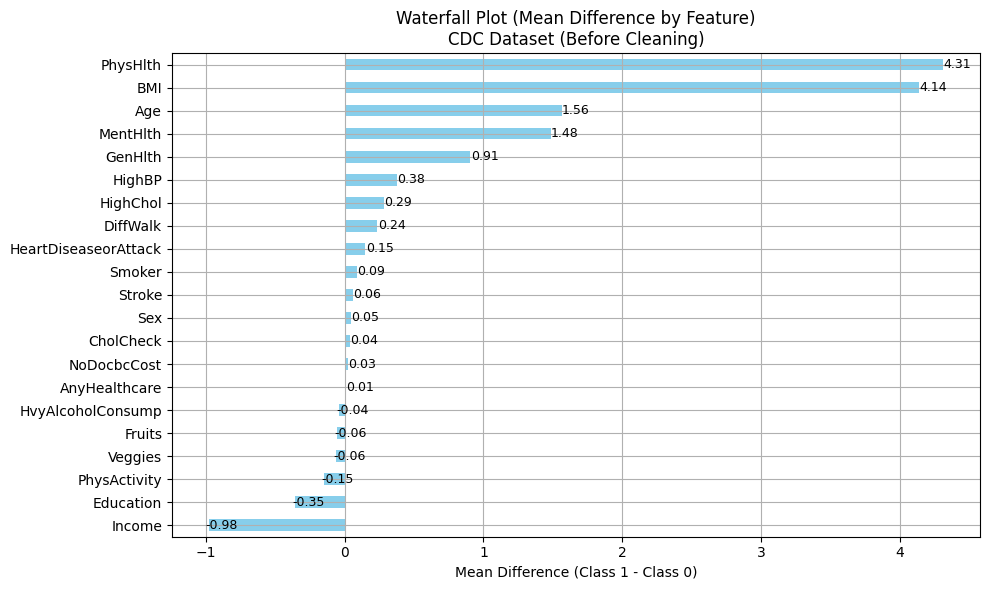

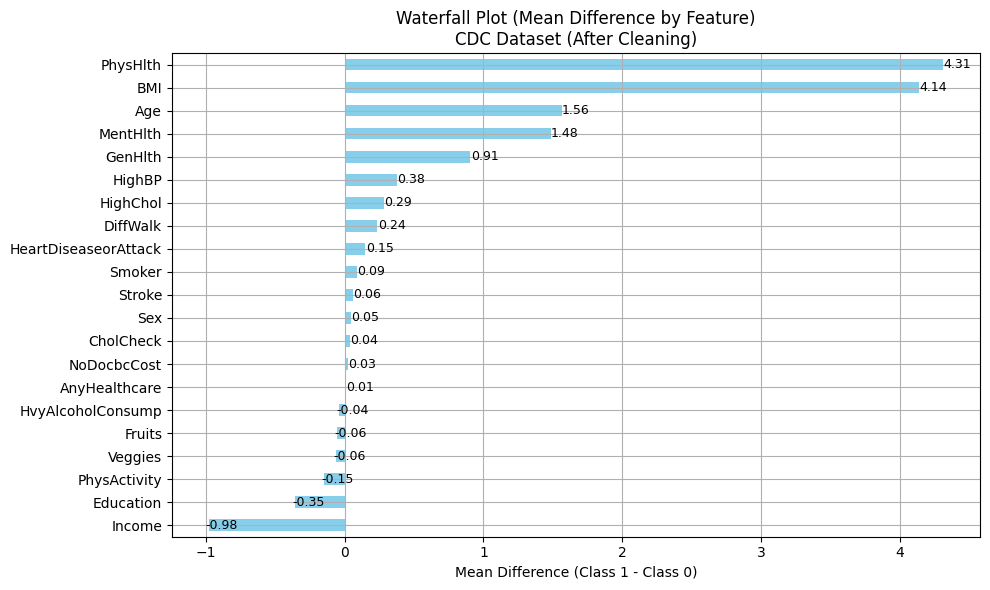

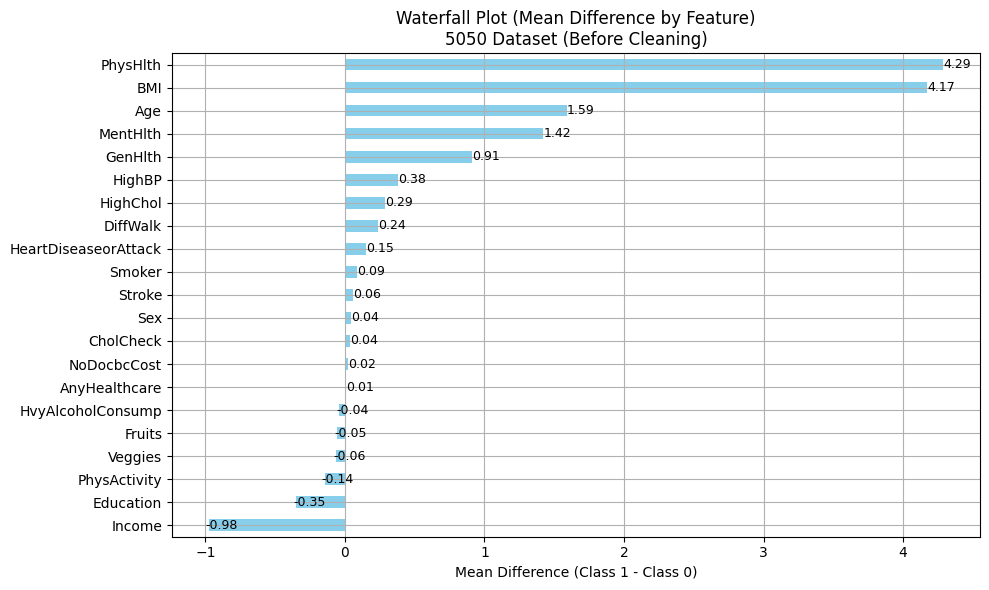

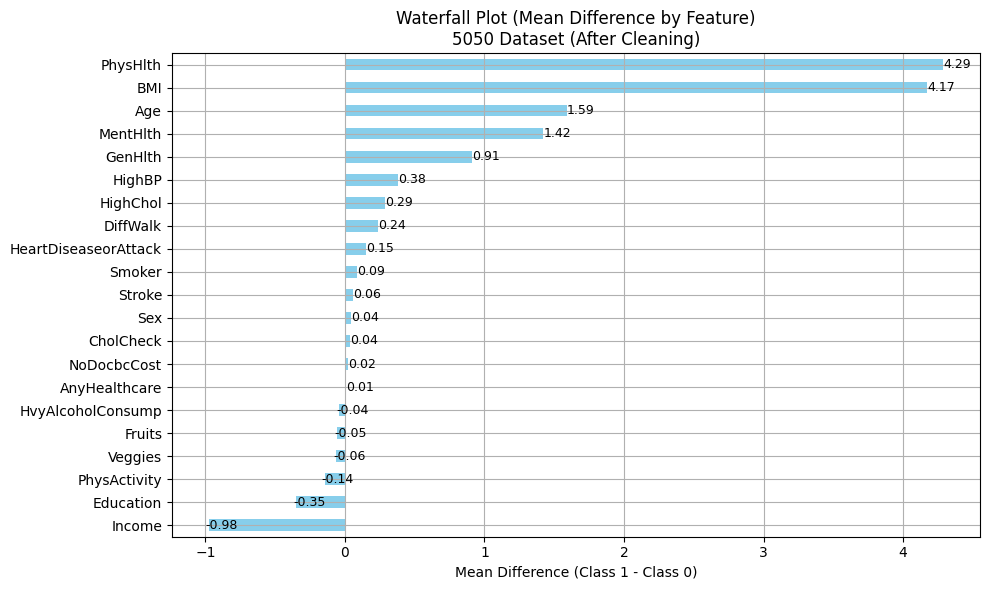

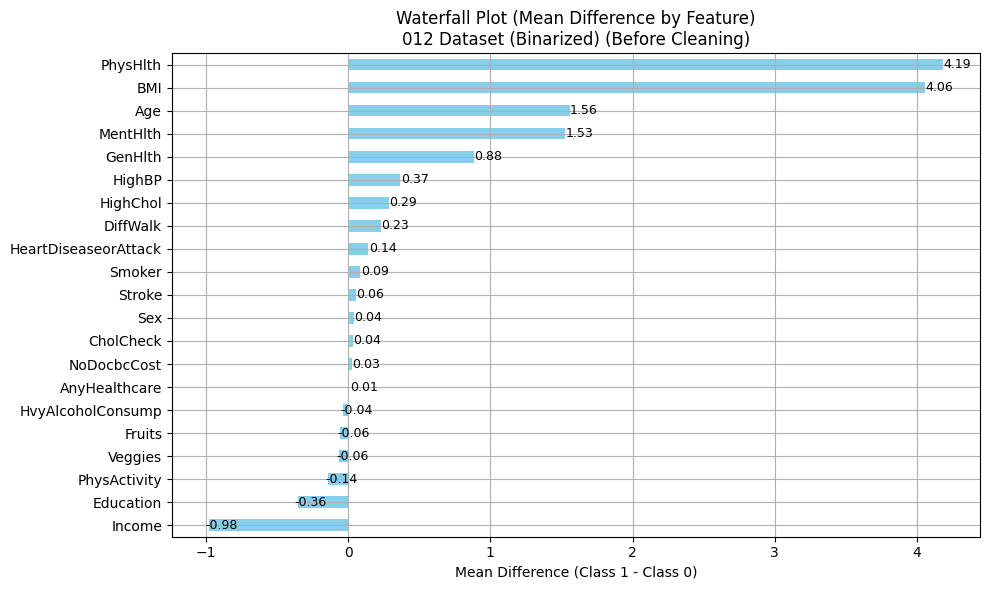

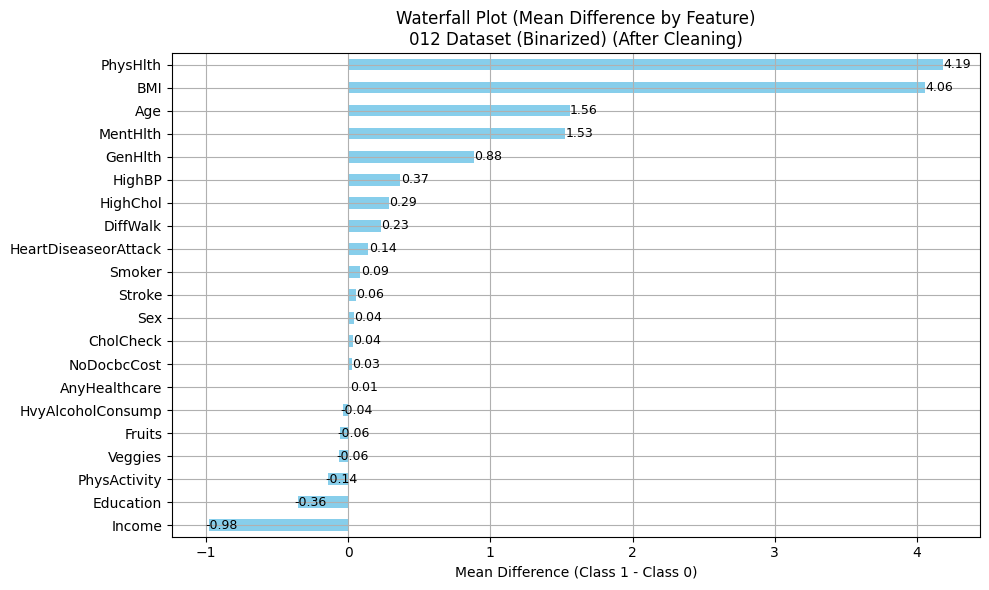

In [30]:
df_012['Diabetes_012'] = df_012['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)
def plot_waterfall(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    class_0 = df_clean[df_clean[target_col] == 0].mean()
    class_1 = df_clean[df_clean[target_col] == 1].mean()
    diff = (class_1 - class_0).drop(labels=[target_col])
    diff_sorted = diff.sort_values()

    plt.figure(figsize=(10, 6))
    diff_sorted.plot(kind='barh', color='skyblue')
    plt.title(f'Waterfall Plot (Mean Difference by Feature)\n{dataset_name} ({stage})')
    plt.xlabel('Mean Difference (Class 1 - Class 0)')
    plt.grid(True)
    for i, v in enumerate(diff_sorted):
        plt.text(v + 0.002 if v > 0 else v - 0.02, i, f'{v:.2f}', va='center', fontsize=9)
    plt.tight_layout()
    plt.show()
datasets = [
    (df_cdc, 'Diabetes_binary', 'CDC Dataset'),
    (df_5050, 'Diabetes_binary', '5050 Dataset'),
    (df_012, 'Diabetes_012', '012 Dataset (Binarized)')]

for df, target, name in datasets:
    plot_waterfall(df, target, name, 'Before Cleaning')
    plot_waterfall(df.dropna(), target, name, 'After Cleaning')

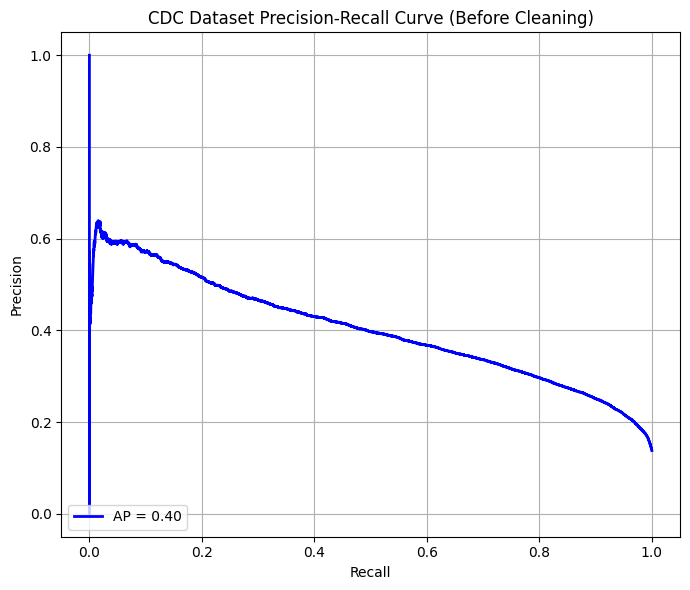

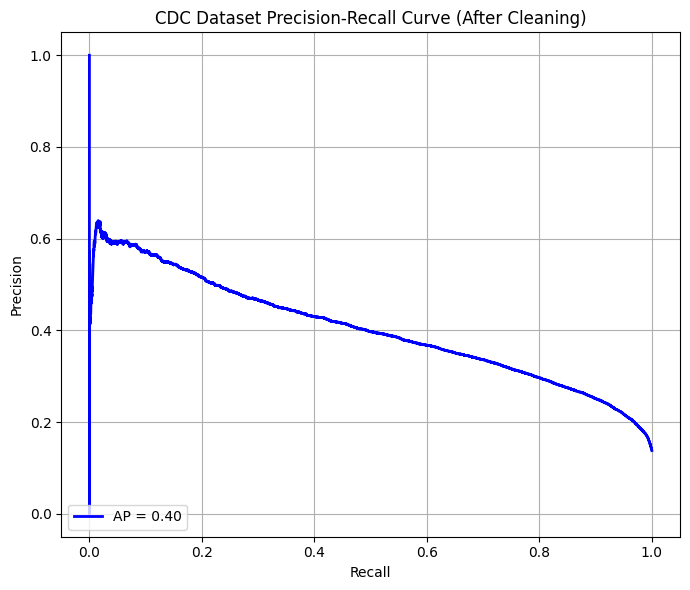

In [31]:
def plot_pr_curve(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap_score = average_precision_score(y_test, y_scores)

    plt.figure(figsize=(7, 6))
    plt.plot(recall, precision, lw=2, label=f'AP = {ap_score:.2f}', color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{dataset_name} Precision-Recall Curve ({stage})')
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

plot_pr_curve(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
plot_pr_curve(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')

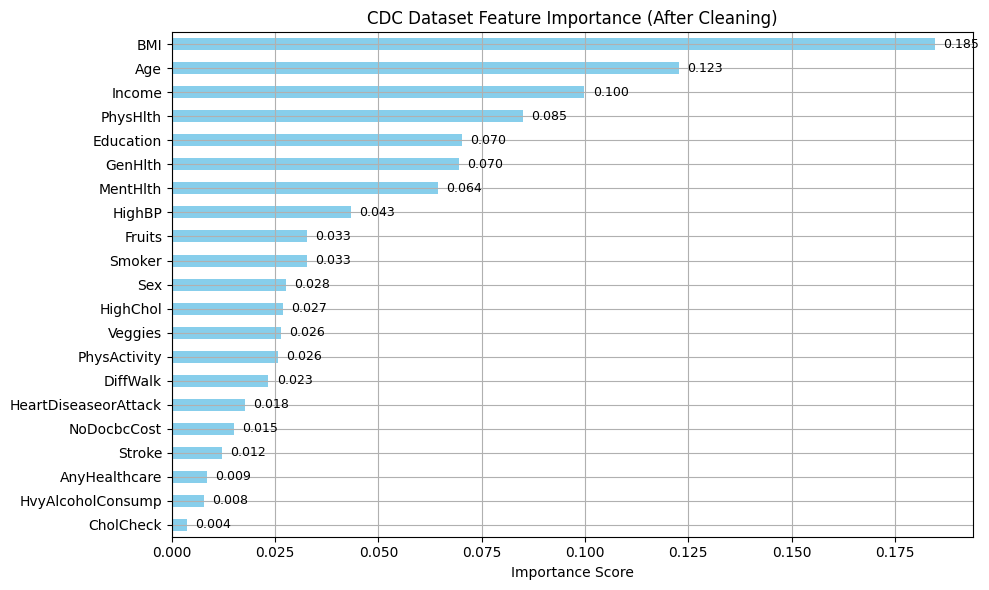

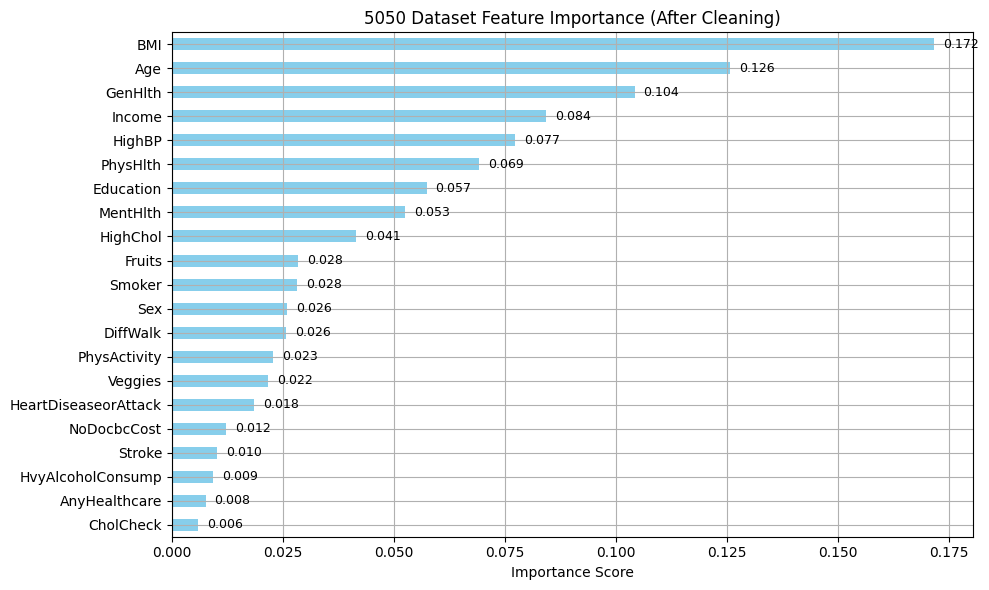

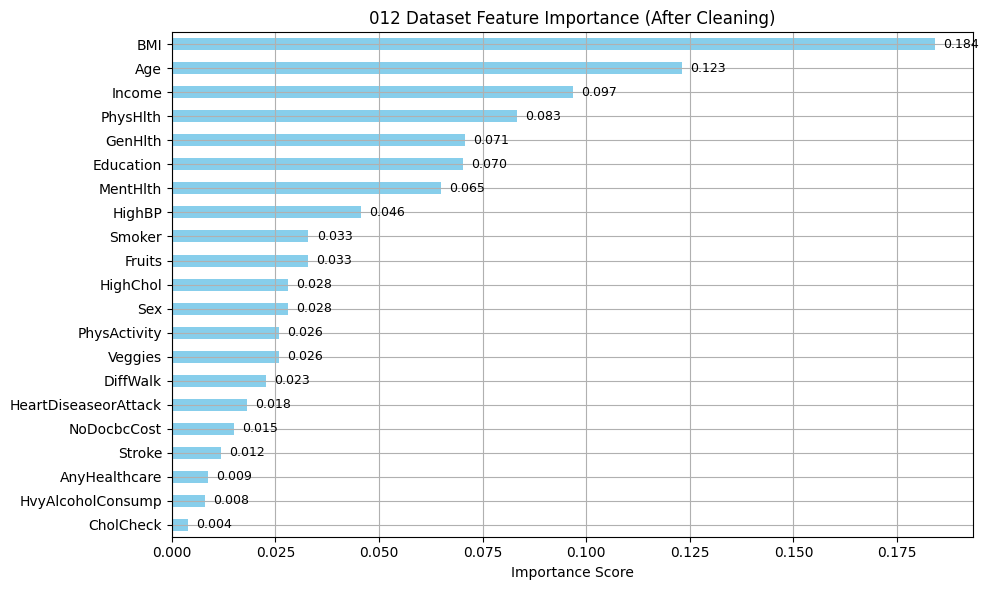

In [32]:
def plot_feature_importance(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns)
    importances_sorted = importances.sort_values()
    plt.figure(figsize=(10, 6))
    ax = importances_sorted.plot(kind='barh', color='skyblue')
    plt.title(f'{dataset_name} Feature Importance ({stage})')
    plt.xlabel('Importance Score')
    plt.grid(True)
    for i, v in enumerate(importances_sorted):
        plt.text(v + 0.002, i, f'{v:.3f}', va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

plot_feature_importance(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')
plot_feature_importance(df_5050, 'Diabetes_binary', '5050 Dataset', 'After Cleaning')
plot_feature_importance(df_012, 'Diabetes_012', '012 Dataset', 'After Cleaning')


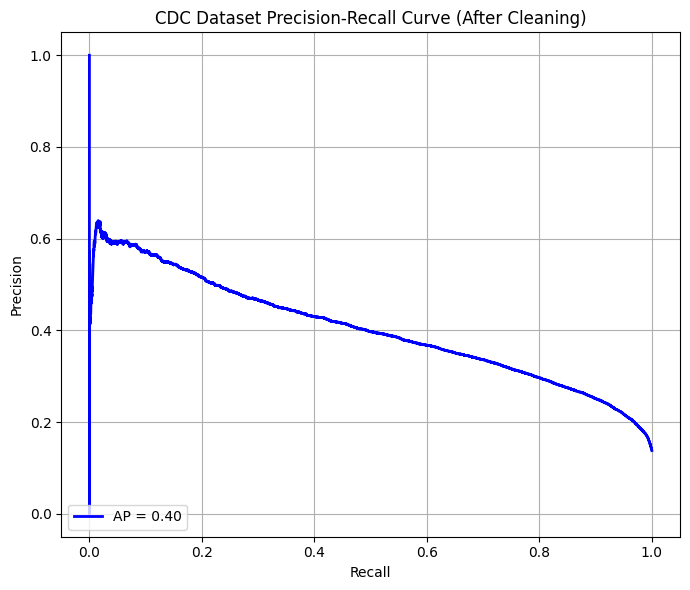

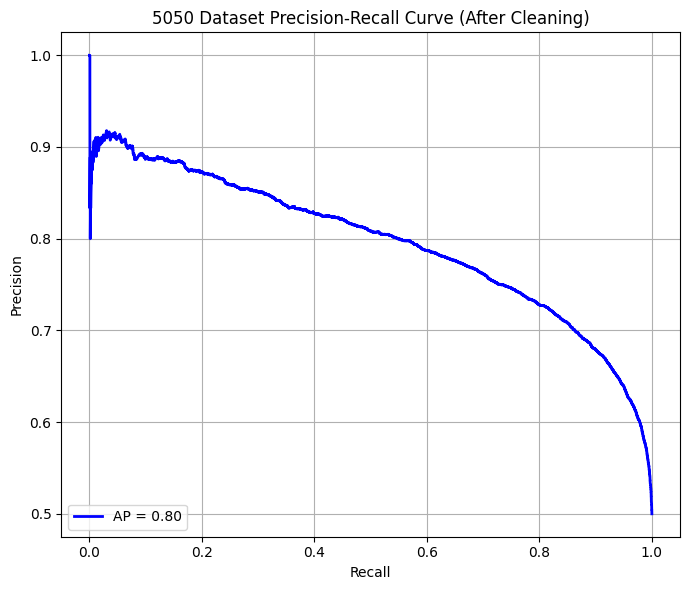

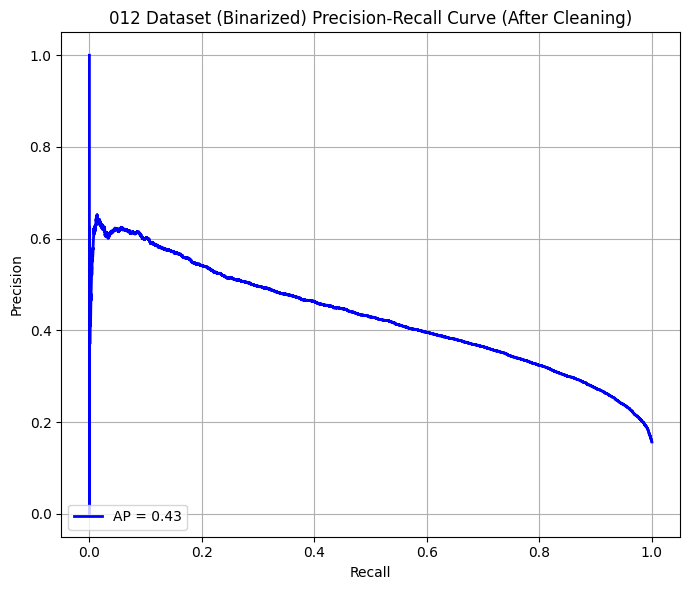

In [33]:
df_012['Diabetes_012'] = df_012['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)
def plot_pr_curve(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap_score = average_precision_score(y_test, y_scores)

    plt.figure(figsize=(7, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {ap_score:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{dataset_name} Precision-Recall Curve ({stage})')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_pr_curve(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')
plot_pr_curve(df_5050, 'Diabetes_binary', '5050 Dataset', 'After Cleaning')
plot_pr_curve(df_012, 'Diabetes_012', '012 Dataset (Binarized)', 'After Cleaning')


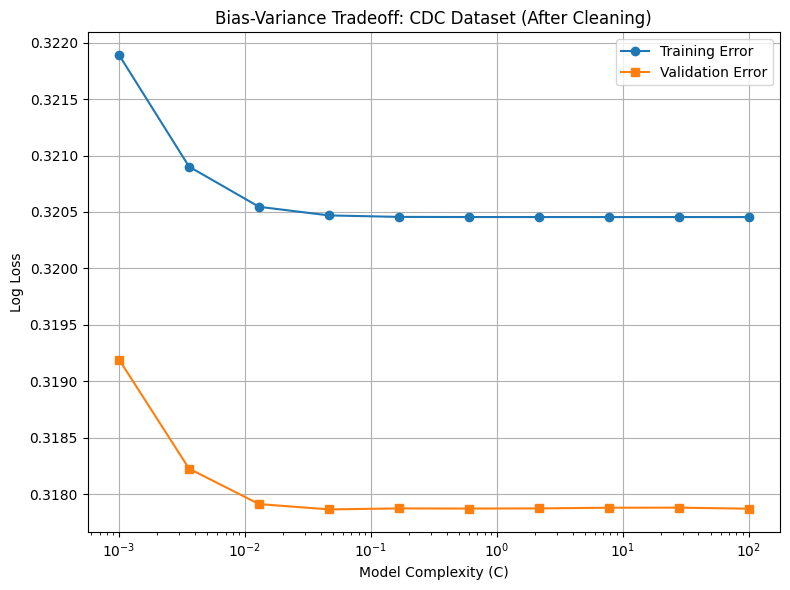

In [34]:
def bias_variance_plot(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    complexities = np.logspace(-3, 2, 10)
    train_errors = []
    val_errors = []

    for c in complexities:
        model = LogisticRegression(C=c, max_iter=1000)
        model.fit(X_train, y_train)
        y_train_pred = model.predict_proba(X_train)
        y_val_pred = model.predict_proba(X_val)
        train_loss = log_loss(y_train, y_train_pred)
        val_loss = log_loss(y_val, y_val_pred)
        train_errors.append(train_loss)
        val_errors.append(val_loss)

    plt.figure(figsize=(8, 6))
    plt.plot(complexities, train_errors, marker='o', label='Training Error')
    plt.plot(complexities, val_errors, marker='s', label='Validation Error')
    plt.xscale('log')
    plt.xlabel('Model Complexity (C)')
    plt.ylabel('Log Loss')
    plt.title(f'Bias-Variance Tradeoff: {dataset_name} ({stage})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

bias_variance_plot(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


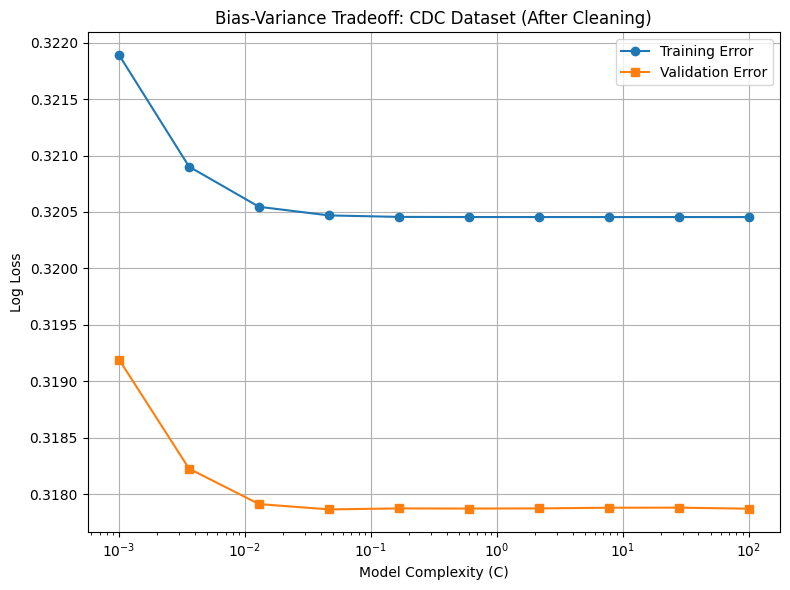

In [35]:
def bias_variance_plot(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    complexities = np.logspace(-3, 2, 10)
    train_errors = []
    val_errors = []
    for c in complexities:
        model = LogisticRegression(C=c, max_iter=1000)
        model.fit(X_train, y_train)
        y_train_pred = model.predict_proba(X_train)
        y_val_pred = model.predict_proba(X_val)
        train_loss = log_loss(y_train, y_train_pred)
        val_loss = log_loss(y_val, y_val_pred)
        train_errors.append(train_loss)
        val_errors.append(val_loss)

    plt.figure(figsize=(8, 6))
    plt.plot(complexities, train_errors, marker='o', label='Training Error')
    plt.plot(complexities, val_errors, marker='s', label='Validation Error')
    plt.xscale('log')
    plt.xlabel('Model Complexity (C)')
    plt.ylabel('Log Loss')
    plt.title(f'Bias-Variance Tradeoff: {dataset_name} ({stage})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

bias_variance_plot(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


In [ ]:
def plot_clustering(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #K-Means
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(6, 5))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
    plt.title(f'K-Means Clustering: {dataset_name} ({stage})')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
    plt.title(f'PCA Projection by Diabetes: {dataset_name} ({stage})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #tsne
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set2', alpha=0.7)
    plt.title(f't-SNE Projection by Diabetes: {dataset_name} ({stage})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_clustering(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
plot_clustering(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-16af0efcac6e>", line 46, in <cell line: 0>
    plot_clustering(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
  File "<ipython-input-37-16af0efcac6e>", line 18, in plot_clustering
    plt.tight_layout()
  File "/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py", line 2835, in tight_layout
    gcf().tight_layout(pad=pad, h_pad=h_pad, w_pad=w_pad, rect=rect)
  File "/usr/local/lib/python3.11/dist-packages/matplotlib/figure.py", line 3640, in tight_layout
    engine.execute(self)
  File "/usr/local/lib/python3.11/dist-packages/matplotlib/layout_engine.py", line 183, in execute
    kwargs = get_tight_layout_figure(
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/matplotlib/_tight_layout.py", line 266, in get_ti

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function _draw_all_if_interactive at 0x7d67169ce8e0> (for post_execute):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-16af0efcac6e>", line 46, in <cell line: 0>
    plot_clustering(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
  File "<ipython-input-37-16af0efcac6e>", line 18, in plot_clustering
    plt.tight_layout()
  File "/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py", line 2835, in tight_layout
    gcf().tight_layout(pad=pad, h_pad=h_pad, w_pad=w_pad, rect=rect)
  File "/usr/local/lib/python3.11/dist-packages/matplotlib/figure.py", line 3640, in tight_layout
    engine.execute(self)
  File "/usr/local/lib/python3.11/dist-packages/matplotlib/layout_engine.py", line 183, in execute
    kwargs = get_tight_layout_figure(
             ^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

In [ ]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
def plot_rf_feature_importance(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_scaled, y)
    importances = rf.feature_importances_
    features = X.columns
    importance_series = pd.Series(importances, index=features).sort_values()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance_series.values, y=importance_series.index, palette='Blues_d')
    for i, v in enumerate(importance_series):
        plt.text(v + 0.002, i, f'{v:.3f}', va='center', fontsize=9)
    plt.title(f'Random Forest Feature Importance: {dataset_name} ({stage})')
    plt.xlabel('Importance Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_rf_feature_importance(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
plot_rf_feature_importance(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


In [ ]:
df_cdc = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
def plot_conf_matrix(df, target_col, dataset_name, stage):
    df_clean = df.dropna()
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    plt.title(f'Confusion Matrix: {dataset_name} ({stage})')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(df_cdc, 'Diabetes_binary', 'CDC Dataset', 'Before Cleaning')
plot_conf_matrix(df_cdc.dropna(), 'Diabetes_binary', 'CDC Dataset', 'After Cleaning')


In [2]:
df_012['Diabetes_012'] = df_012['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)

def print_stats(df, name, target_col):
    print(f"\n🗂️ Dataset: {name}")
    print("Shape Before Cleaning:", df.shape)
    print("Shape After Cleaning:", df.dropna().shape)
    print("\nMissing Values (Before Cleaning):")
    print(df.isnull().sum())
    print("\n📊 Descriptive Stats (Before Cleaning):")
    print(df.describe().T)
    print("\n📊 Descriptive Stats (After Cleaning):")
    print(df.dropna().describe().T)

print_stats(df_cdc, 'CDC Dataset', 'Diabetes_binary')
print_stats(df_5050, '5050 Dataset', 'Diabetes_binary')
print_stats(df_012, '012 Dataset (Binarized)', 'Diabetes_012')



🗂️ Dataset: CDC Dataset
Shape Before Cleaning: (253680, 22)
Shape After Cleaning: (253680, 22)

Missing Values (Before Cleaning):
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

📊 Descriptive Stats (Before Cleaning):
                         count       mean       std   min   25%   50%   75%  \
Diabetes_binary       253680.0   0.139333  0.346294   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighCho

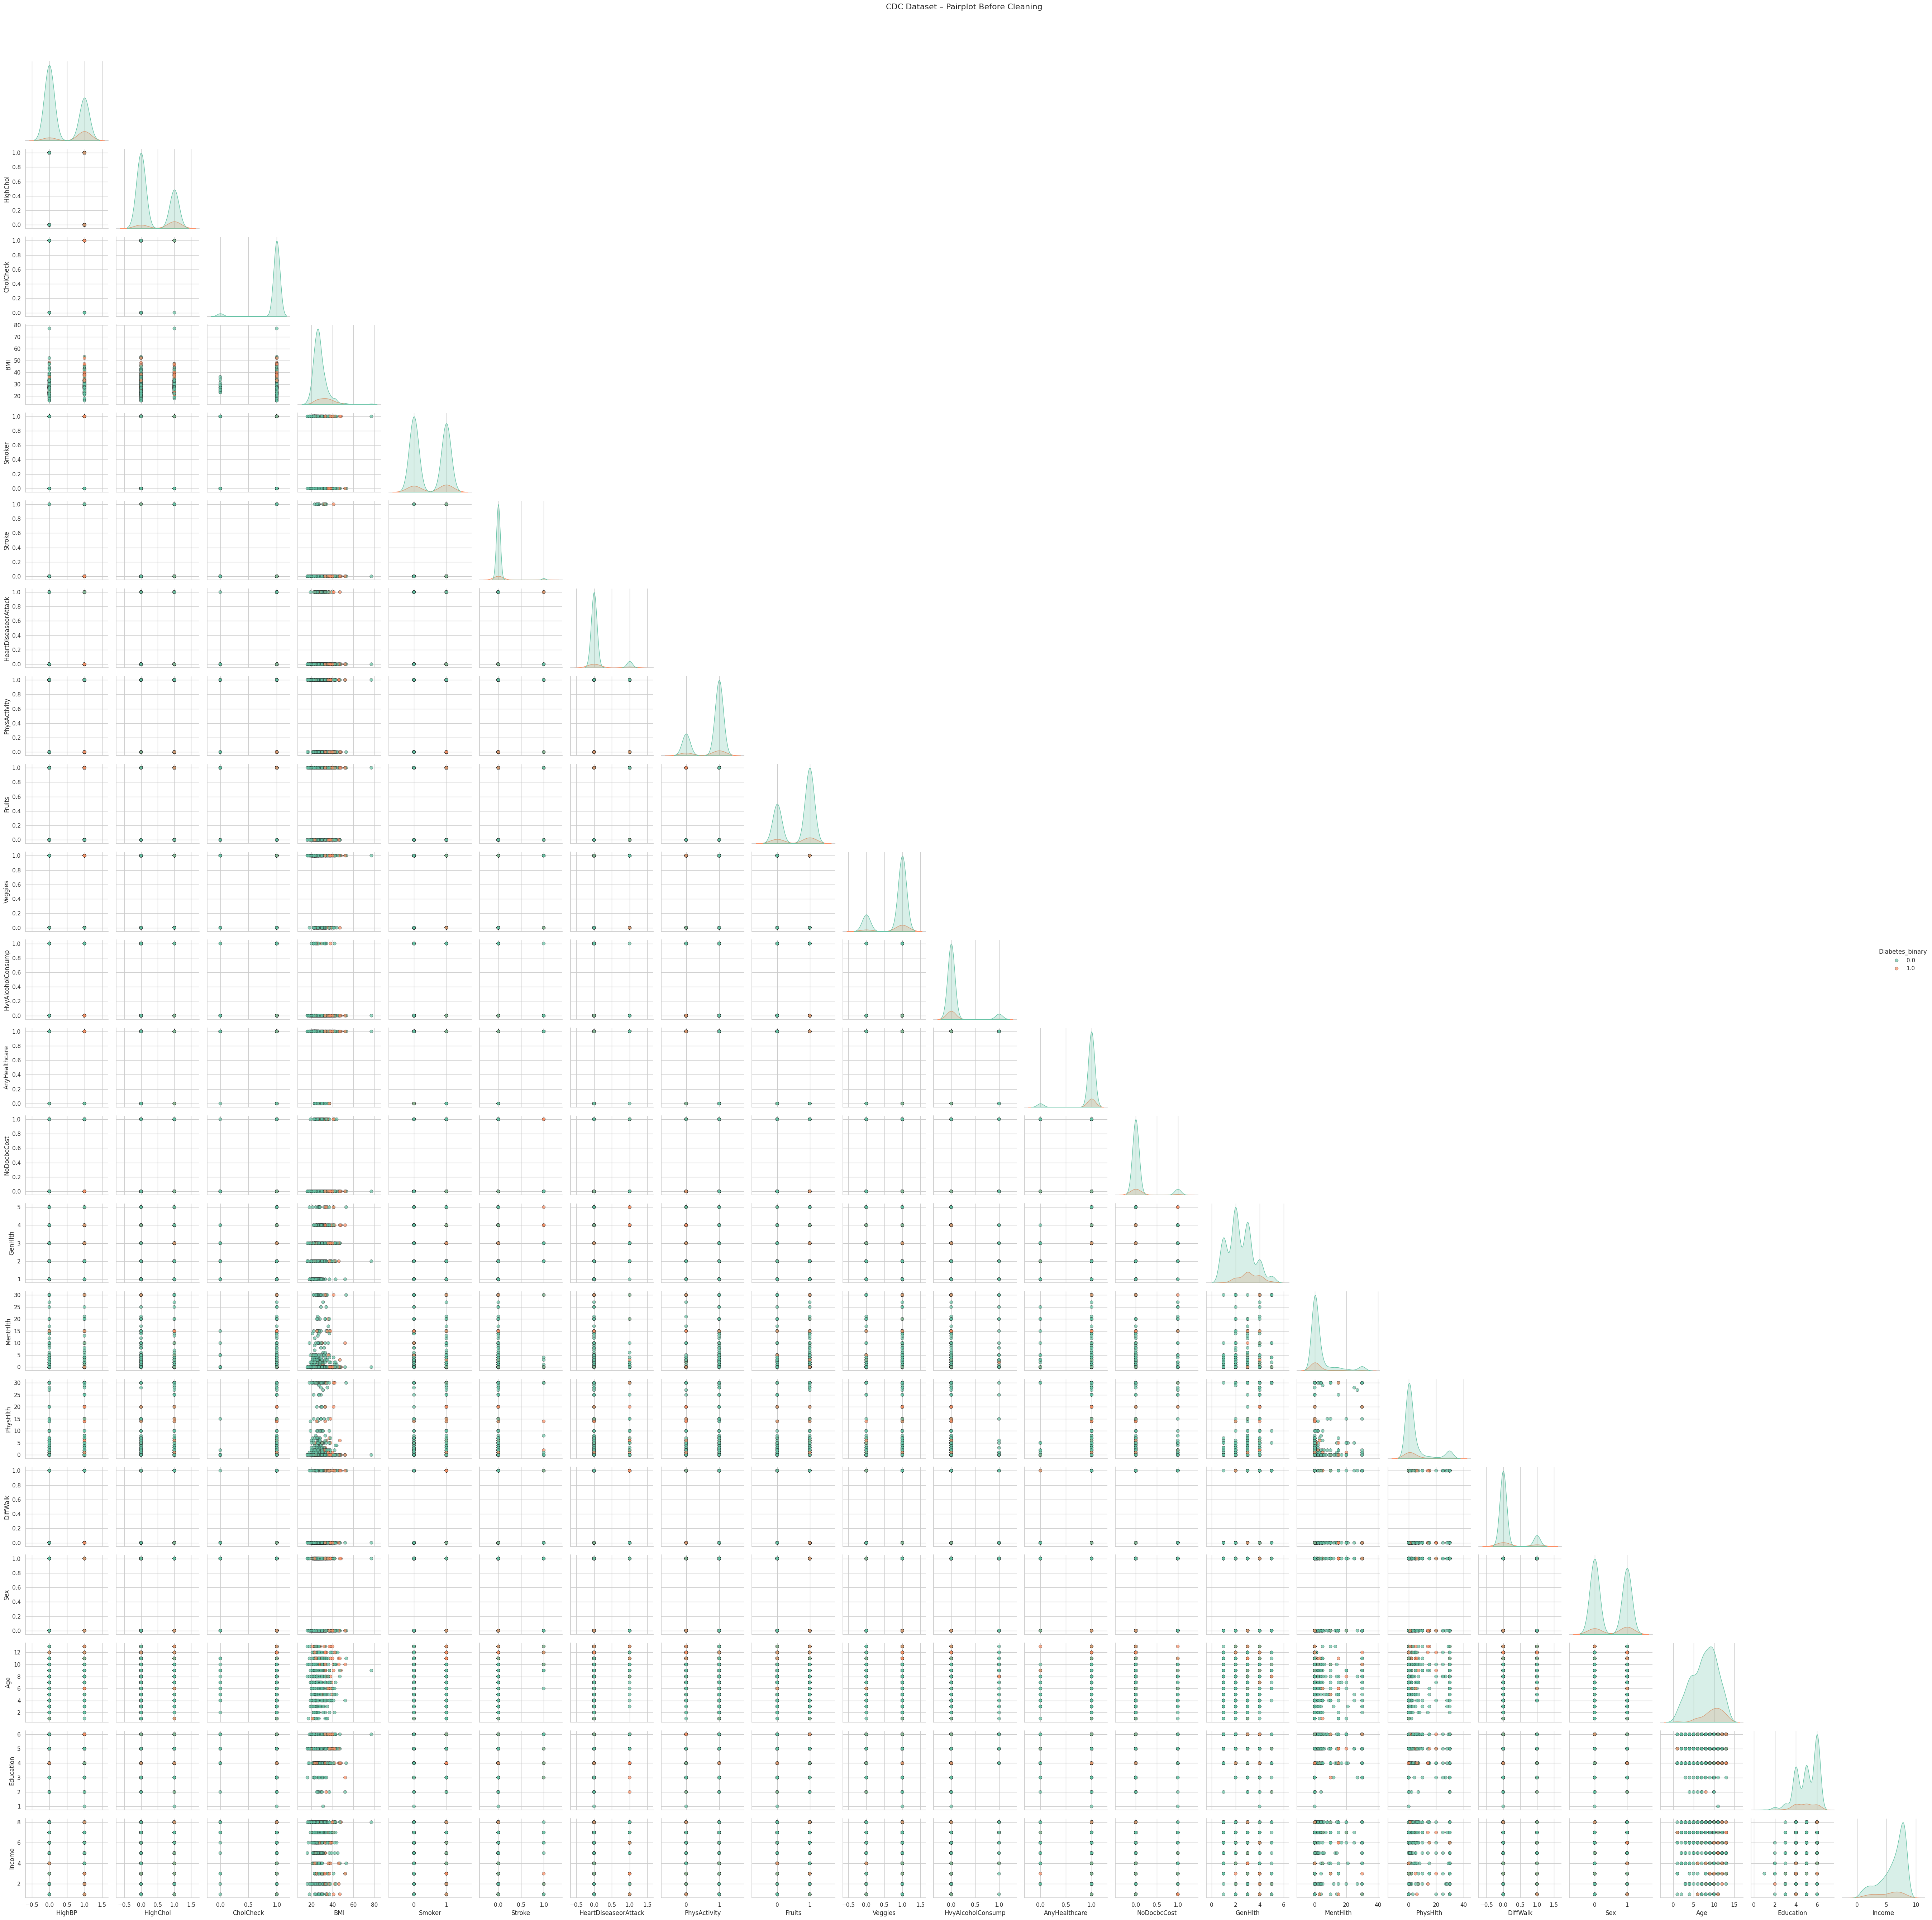

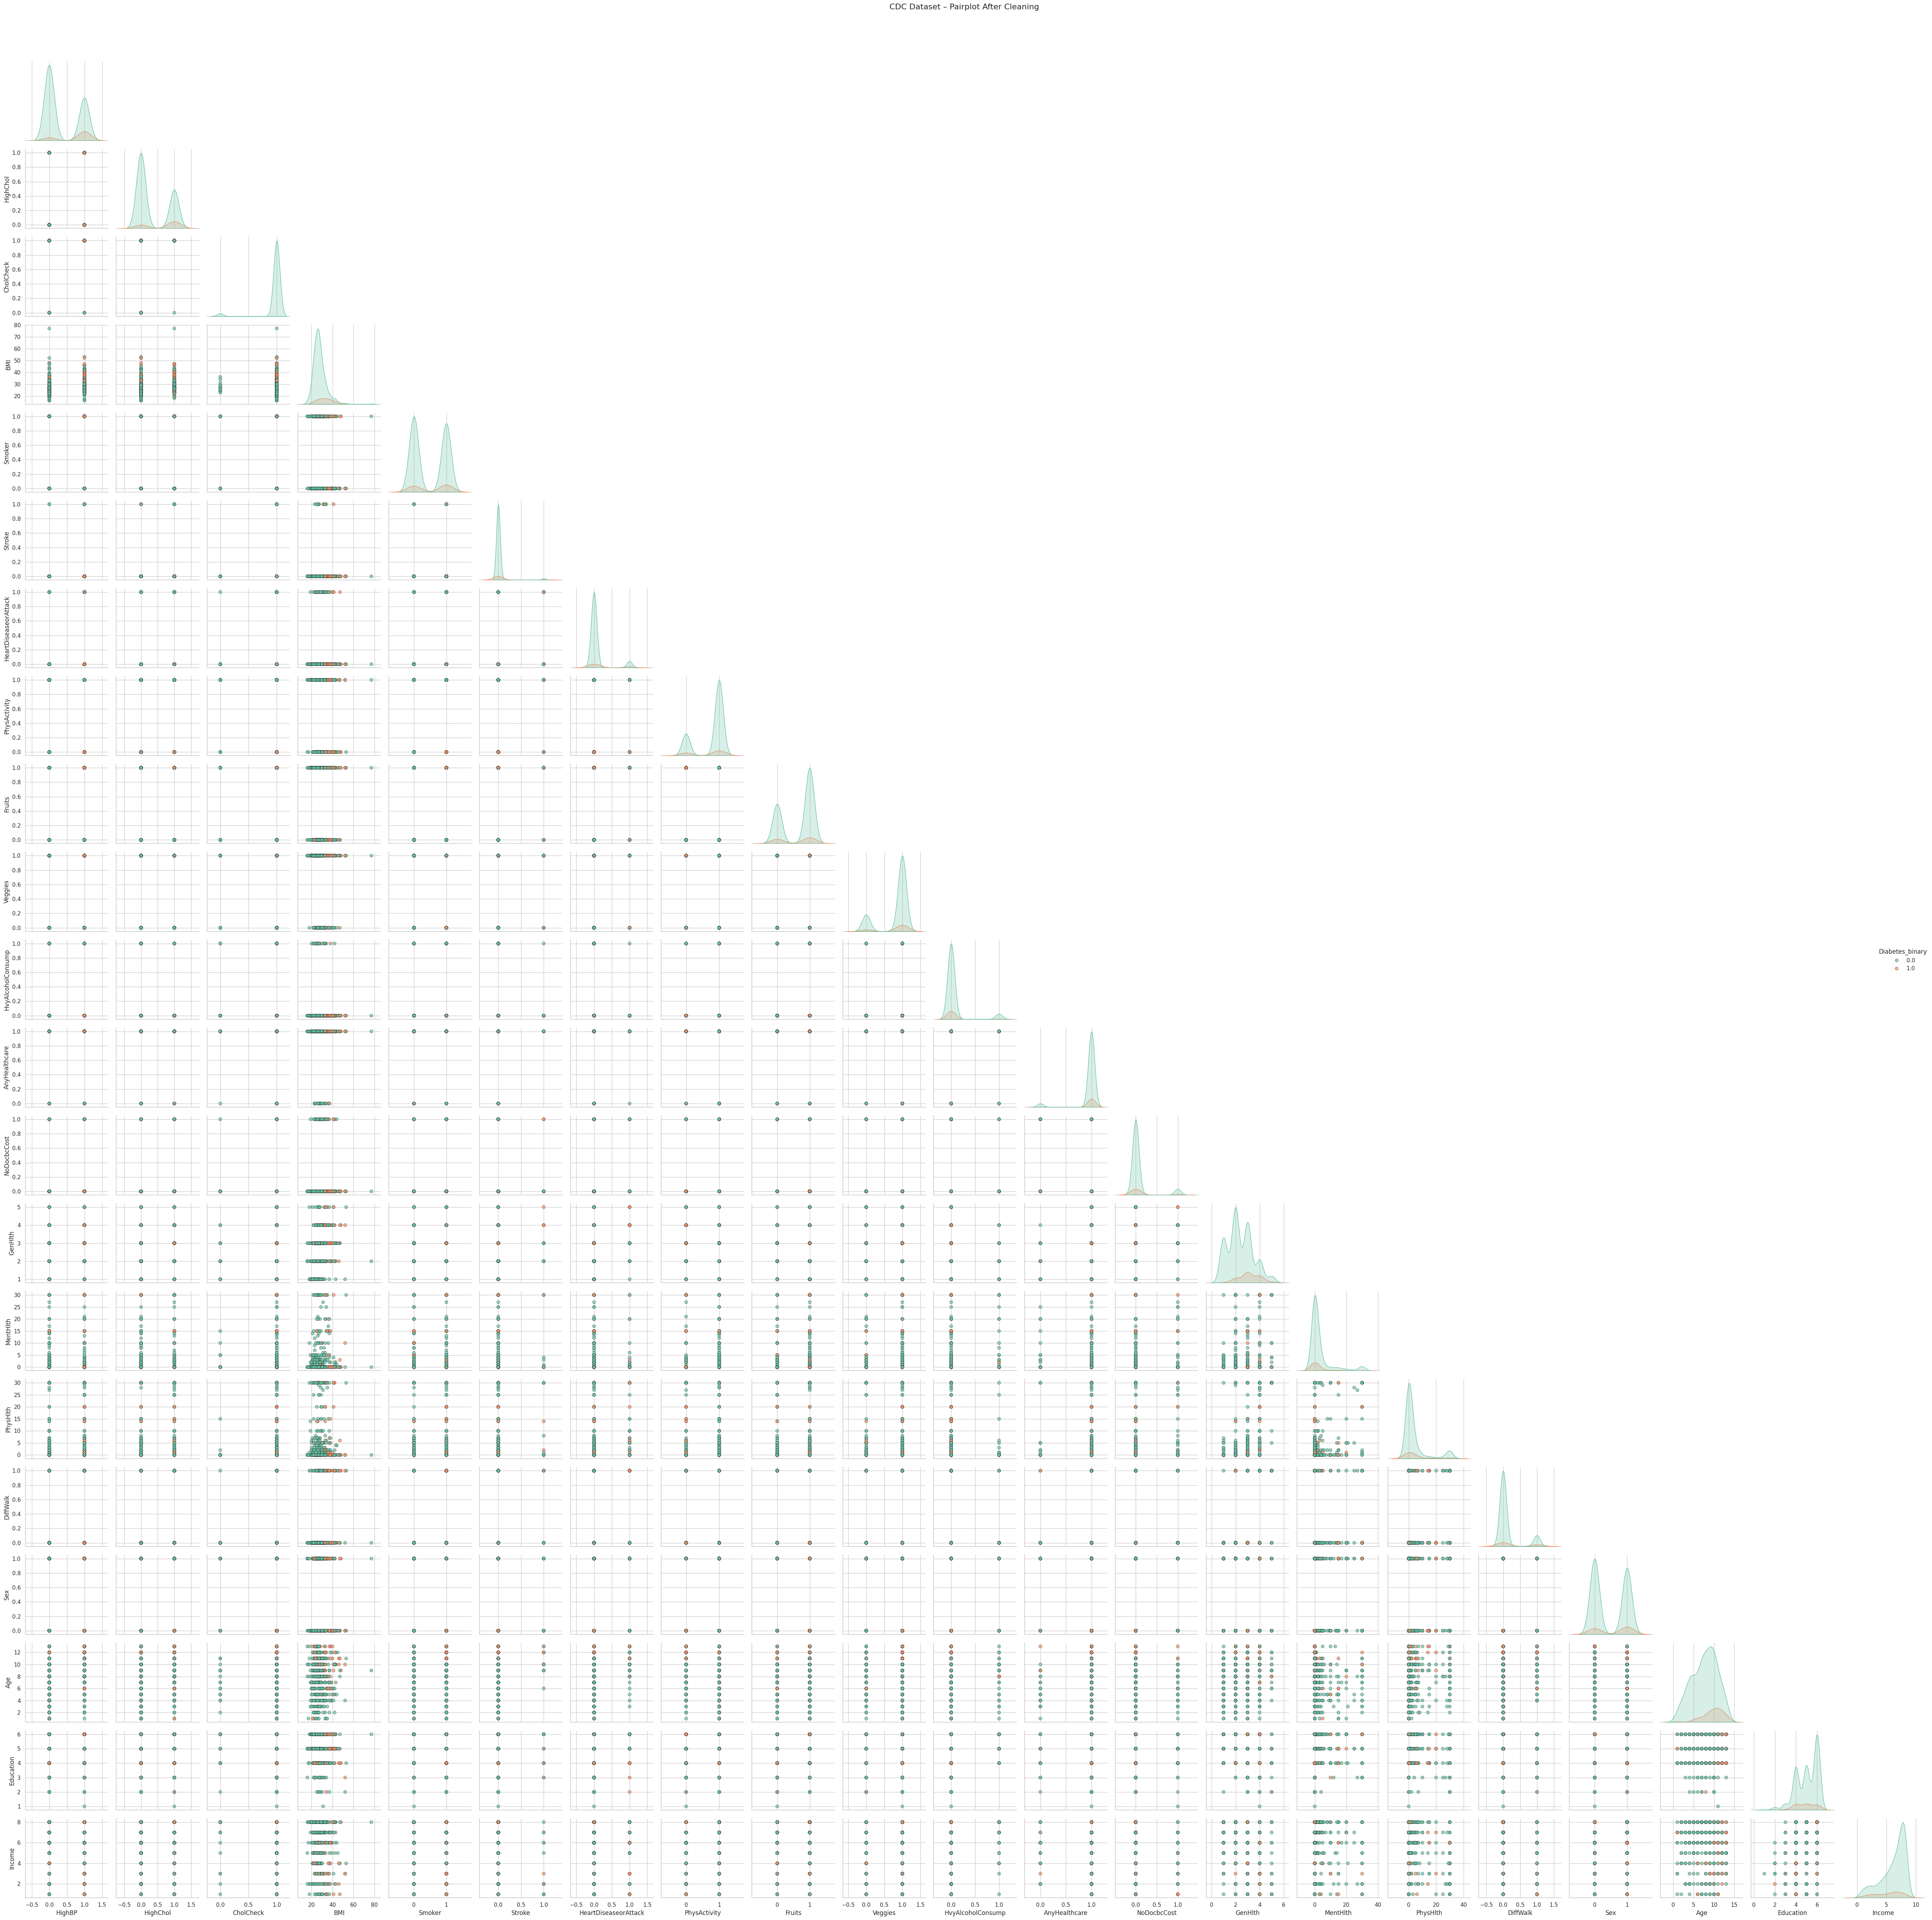

In [4]:
sample_before = df_cdc.sample(500, random_state=42)
sample_after = df_cdc.dropna().sample(500, random_state=42)

sns.set(style="whitegrid")
palette = {0: "Green", 1: "orange"}
#before
sns.pairplot(
    sample_before,
    hue='Diabetes_binary',
    corner=True,
    plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'},
    palette=palette)
plt.suptitle("CDC Dataset – Pairplot Before Cleaning", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
#after
sns.pairplot(
    sample_after,
    hue='Diabetes_binary',
    corner=True,
    plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'},
    palette=palette)
plt.suptitle("CDC Dataset – Pairplot After Cleaning", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


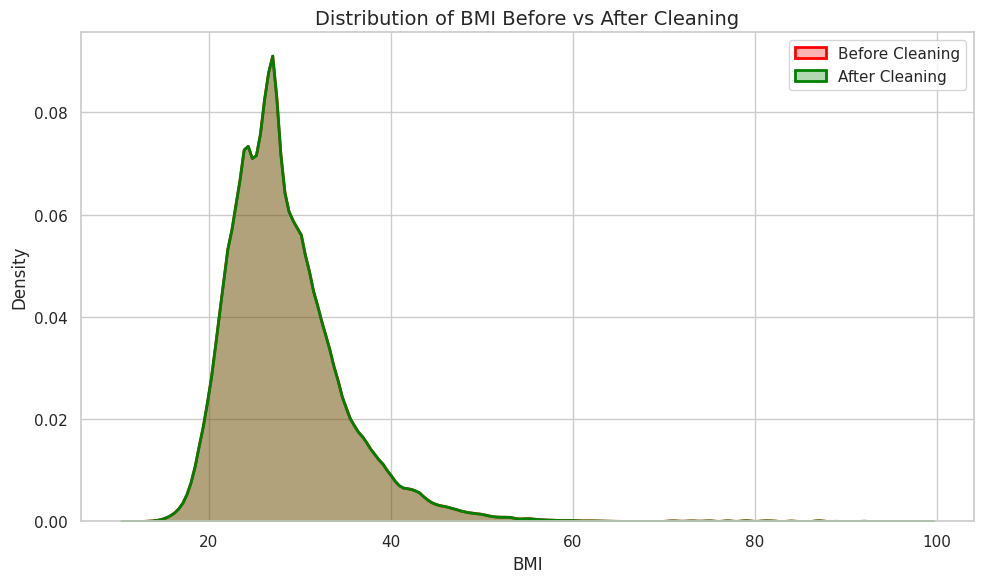

In [5]:
feature = 'BMI'
before = df_cdc[feature].dropna()
after = df_cdc.dropna()[feature]

plt.figure(figsize=(10, 6))
sns.kdeplot(before, label='Before Cleaning', color='red', linewidth=2, fill=True, alpha=0.3)
sns.kdeplot(after, label='After Cleaning', color='green', linewidth=2, fill=True, alpha=0.3)
plt.title(f'Distribution of {feature} Before vs After Cleaning', fontsize=14)
plt.xlabel(feature)
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
